In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("lung.csv")
print(new_data.shape)

C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,

(205, 12601)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F3( N features ) → F1( 2N/3 features out of selected features from F3) →    
##           F2(N/3 features out of selected features from F1)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print('Required data set ')
df.head()

Required data set 


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,AD,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,AD,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [4]:
df.isnull().sum()

class          0
38691_s_at     0
37864_s_at     0
33273_f_at     0
33274_f_at     0
              ..
41422_at       0
39964_at       0
36120_at       0
40571_at       0
36312_at       0
Length: 12601, dtype: int64

In [5]:
df.iloc[:,0].unique()
df[df.columns[0]] = pd.factorize(df[df.columns[0]])[0]
df.head()

C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,0,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,0,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,0,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,0,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,0,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [6]:
feature_set = df.iloc[:,1:]
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['38691_s_at ', '37864_s_at ', '33273_f_at ', '33274_f_at ', '33501_r_at ', '33500_i_at ', '33499_s_at ', '41164_at ', '38194_s_at ', '37004_at ', '40808_at ', '41827_f_at ', '34105_f_at ', '41165_g_at ', '769_s_at ', '33699_at ', '31444_s_at ', '33383_f_at ', '37039_at ', '32052_at ', '32805_at ', '34301_r_at ', '33322_i_at ', '35566_f_at ', '35083_at ', '33377_at ', '34342_s_at ', '32252_at ', '36780_at ', '31687_f_at ', '37383_f_at ', '39248_at ', '34485_r_at ', 'AFFX ', '35905_s_at ', '676_g_at ', '35530_f_at ', '39026_r_at ', '41237_at ', 'AFFX-HUMGAPDH/M33197_5_at ', '32648_at ', '39016_r_at ', '35016_at ', '613_at ', '38784_g_at ', '36130_f_at ', '38126_at ', '36785_at ', 'AFFX-HUMGAPDH/M33197_3_at ', '38582_at ', '31525_s_at ', '32275_at ', '39220_at ', '31477_at ', '33261_at ', '700_s_at ', '37021_at ', '201_s_at ', '41446_f_at ', '37897_s_at ', '31586_f_at ', '35474_s_at ', '2027_at ', '39594_f_at ', '41745_at ', '31557_at ', '38095_i_at ', '40544_g_at ', '390

In [7]:
feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [8]:
target_feature = df[df.columns[0]]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class , dtype: int64

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,-0.921957,0.089114,-0.358903,-0.308779,-1.224893,-1.129251,-1.347017,-0.940166,-0.240499,-1.231893,...,0.029278,0.676299,1.202205,-0.259985,-0.322778,-0.446593,0.474743,0.521697,-0.284627,-0.778784
1,-0.566868,0.941621,1.285483,1.300554,0.995647,1.106711,1.323679,1.577288,0.611542,-0.588631,...,0.764167,-0.102548,-0.203140,0.300033,0.667041,0.493047,0.575154,-0.680777,0.170760,0.970673
2,0.210410,1.217338,1.220395,1.091475,0.415313,0.296740,0.648918,0.107713,0.923282,-0.534910,...,0.063735,-0.177118,-0.877780,0.181972,0.369599,0.313565,-0.152354,-0.170210,-0.103233,-0.248916
3,-0.921615,1.284640,1.309472,1.307123,0.868111,0.682642,0.941947,2.188311,1.105149,1.323253,...,0.472345,0.265087,0.445315,0.279944,0.153813,-0.199728,0.107092,1.200160,0.240210,0.929277
4,0.411684,0.972753,1.099487,1.251929,0.743846,0.688795,0.768647,0.721515,1.256965,1.146115,...,0.437278,-1.210363,0.056858,-0.410189,0.670146,0.181904,-0.090923,-0.361868,-0.218031,-0.055947


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((162, 12600), (41, 12600))

In [11]:
y_train.shape, y_test.shape

((162,), (41,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns
print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 8400.0
number_of_features_required_2 : 4200.0
number_of_features_required_3 : 2394.0
number_of_features_required_1 in integers: 8400
number_of_features_required_2 in integers: 4200
number_of_features_required_3 in integers: 2394


# Feature Selection Using T-Test

In [14]:
start_time_t = time.time()
x= df.values.copy()              # It is converting df into numpy arrray


a,b = x.shape     # Here, a is taking row and b is taking columns        
n1 =0
n2 = 0
n3=0
n4 = 0
n5 = 0

for i in range(a):        
    if x[i][0] == 0:
        n1 = n1 + 1;
    elif x[i][0] ==1:
        n2 = n1 + 1;
    elif x[i][0] == 2:
        n3 = n1 + 1;
    elif x[i][0] ==3:
        n4 = n1 + 1;
    else:
        n5 = n1 + 1;

n = [n1,n2,n3,n4,n5]



tval=[]
sample1=[]
sample2=[]
sample3=[]
sample4=[]
sample5=[]

# It is calculating t value
for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 0:          
            sample1.append(x[i][j])
        elif x[i][0]== 1:
            sample2.append(x[i][j])
        elif x[i][0]== 2:
            sample3.append(x[i][j])
        elif x[i][0]== 3:
            sample4.append(x[i][j])
        else :
            sample5.append(x[i][j])

# It is converting sample values from string to float
    sample1 = list(map(float,sample1))       
    sample2 = list(map(float,sample2))
    sample3 = list(map(float, sample3))
    sample4 = list(map(float, sample4))
    sample5 = list(map(float, sample5))

    sample = [sample1,sample2,sample3,sample4,sample5]



    sbar = [0,0,0,0,0]
    svar = [0,0,0,0,0]
    tset = []
    for p in range(5):
         sbar[p] =  statistics.mean(sample[p])         
            
    for q in range(5):
        svar[q] = statistics.variance(sample[q])     




    for m in range(4):

        for k in range(m+1,5):
          t = abs(sbar[m] - sbar[k])/np.sqrt(svar[m]/n[m]+svar[m]/n[k])  # It is calculating t value by comparing mean and variance using given formula
          tset.append(t)

    tavg = statistics.mean(tset)
    tval.append(tavg)       
    
    sample1.clear()    
    sample2.clear()
    sample3.clear()
    sample4.clear()
    sample5.clear()
    tset.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]   
new_index.reverse()  

required_features_t = new_index[:number_of_features_required_1]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :63.531832218170166 seconds


In [15]:
print(required_features_t)

[11, 141, 26, 28, 104, 126, 41, 184, 122, 249, 68, 198, 105, 160, 165, 85, 537, 203, 749, 44, 452, 293, 69, 684, 133, 835, 99, 42, 317, 898, 772, 986, 945, 602, 442, 1138, 661, 376, 38, 391, 398, 1355, 880, 641, 462, 755, 381, 1412, 63, 295, 78, 1240, 368, 474, 143, 60, 202, 1094, 1128, 1149, 785, 1624, 117, 1762, 633, 1334, 1400, 955, 1988, 1245, 308, 304, 1976, 1634, 936, 425, 1175, 1971, 687, 810, 270, 64, 816, 206, 2053, 908, 2678, 689, 1168, 1055, 183, 1630, 679, 21, 176, 1519, 2288, 756, 1503, 297, 800, 83, 876, 114, 1220, 1512, 1018, 528, 468, 1342, 2326, 54, 2081, 1455, 899, 23, 2244, 2572, 1464, 964, 778, 1532, 185, 1714, 3097, 2795, 2565, 393, 779, 22, 1875, 344, 1490, 1281, 698, 558, 1415, 1929, 1513, 1255, 1253, 1932, 1363, 3284, 761, 1047, 716, 403, 925, 615, 2430, 3045, 416, 708, 81, 664, 1761, 2159, 1037, 582, 1944, 1260, 1898, 1459, 1201, 2794, 4492, 4423, 1553, 644, 1145, 1782, 2878, 1884, 830, 1227, 421, 1041, 2776, 1409, 1173, 1879, 4235, 836, 1038, 89, 3380, 402, 25

In [16]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  8400


In [17]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['40808_at ', '36924_r_at ', '33377_at ', '32252_at ', '33702_f_at ', '33426_at ', '32648_at ', '33703_f_at ', '1390_s_at ', '34265_at ', '40544_g_at ', '40649_at ', '273_g_at ', '272_at ', '37478_at ', '39015_f_at ', '41430_at ', '40201_at ', '38887_r_at ', '613_at ', '40995_at ', '36148_at ', '39052_at ', '40165_at ', '35726_at ', '33157_at ', '38465_at ', '39016_r_at ', '39352_at ', '41289_at ', '39990_at ', '38484_at ', '40272_at ', '41629_at ', '39332_at ', '38886_i_at ', '40746_at ', '41209_at ', '39026_r_at ', '32323_at ', '41424_at ', '36160_s_at ', '260_at ', '40543_at ', '32650_at ', '41792_at ', '38285_at ', '35245_at ', '2027_at ', '917_g_at ', '692_s_at ', '35668_at ', '36606_at ', '916_at ', '926_at ', '37897_s_at ', '35194_at ', '39266_at ', '35778_at ', '32771_at ', '37210_at ', '35592_at ', '37399_at ', '39178_at ', '39696_at ', '35742_at ', '36750_at ', '40075_at ', '32652_g_at ', '36394_at ', '32254_at ', '34842_at ', '37182_at ', '38174_at ', 

In [18]:
X_train1 = X_train.iloc[:,required_features_t]
X_train1.head()

,41827_f_at,32378_at,34342_s_at,36780_at,273_g_at,256_s_at,39016_r_at,37015_at,1081_at,33614_at,...,1144_at,38351_at,36118_at,37586_at,35487_at,1994_at,36995_at,34981_at,40618_at,39258_at
116,0.043547,-0.890271,-0.715176,0.096222,-0.263389,-0.174389,-0.347653,0.036821,0.309012,-0.125239,...,-1.470893,0.087925,1.085225,-2.175703,-1.641090,-1.891094,-0.276837,-0.425672,0.087908,-0.973136
55,0.947941,0.050728,-0.659349,-0.561450,-0.226946,0.571216,-0.343221,-0.292945,-0.346053,-0.386301,...,-0.623333,-1.078858,0.152811,-0.858982,-1.293905,-1.446828,-0.156578,-1.262039,-1.074353,-1.063565
26,0.017129,-1.153657,-0.820792,-0.527596,-0.218961,0.509466,-0.398096,-0.410524,0.038854,0.488134,...,0.349404,0.425604,-0.191596,0.047304,1.521434,0.483167,-0.261711,0.278348,-0.334349,1.095858
130,1.222252,-0.349643,-0.946623,0.012800,-0.229107,-1.088589,-0.385797,-0.085178,3.189852,-1.641926,...,-1.064359,-0.670908,1.075204,0.880551,-0.497325,-0.305627,-0.624432,-0.388329,0.186900,-0.507307
177,-0.900902,0.562408,-0.300878,-0.667477,-0.205808,-0.826689,3.117531,-0.346039,2.813344,0.146956,...,-0.689991,-0.915207,-0.189568,-1.059432,-0.578443,-0.634147,-0.315187,-0.957531,0.658166,-0.104805


# Selection of features using Mutual Information 

In [19]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values
 
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
 
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    
    n_x_i=len(n_x[int(pt[1])])
    
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [20]:

X_train_tp=[]
temp=X_train.values.transpose()
for arr in temp:
  X_train_tp.append(arr.astype(float))

mi_start_time = time.time()

total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_38691_s_at  :  0.2770028345121772
Mutual Information between Target Class and Feature_37864_s_at  :  0.2702596740466957
Mutual Information between Target Class and Feature_33273_f_at  :  0.16475980812715474
Mutual Information between Target Class and Feature_33274_f_at  :  0.14731305675990972
Mutual Information between Target Class and Feature_33501_r_at  :  0.18853954709879897
Mutual Information between Target Class and Feature_33500_i_at  :  0.16918793664099938
Mutual Information between Target Class and Feature_33499_s_at  :  0.2262947319126555
Mutual Information between Target Class and Feature_41164_at  :  0.17702940078281776
Mutual Information between Target Class and Feature_38194_s_at  :  0.30891013492546676
Mutual Information between Target Class and Feature_37004_at  :  0.29306473499967955
Mutual Information between Target Class and Feature_40808_at  :  0.346930115477732
Mutual Information between Target Class and Feature_41

Mutual Information between Target Class and Feature_31545_at  :  0.2095575410975232
Mutual Information between Target Class and Feature_39775_at  :  0.3865647763400712
Mutual Information between Target Class and Feature_829_s_at  :  0.31039402363488006
Mutual Information between Target Class and Feature_38465_at  :  0.3489374433341461
Mutual Information between Target Class and Feature_37449_i_at  :  0.23528837667684505
Mutual Information between Target Class and Feature_31697_s_at  :  0.19268575972220003
Mutual Information between Target Class and Feature_36617_at  :  0.046707517891054165
Mutual Information between Target Class and Feature_37421_f_at  :  0.1396798742532615
Mutual Information between Target Class and Feature_33702_f_at  :  0.29248825589791777
Mutual Information between Target Class and Feature_273_g_at  :  0.23438313724503065
Mutual Information between Target Class and Feature_31719_at  :  0.33708893961405856
Mutual Information between Target Class and Feature_1612_s_a

Mutual Information between Target Class and Feature_34592_at  :  0.09789898217713866
Mutual Information between Target Class and Feature_40886_at  :  0.06532658091370196
Mutual Information between Target Class and Feature_36156_at  :  0.25321214763884375
Mutual Information between Target Class and Feature_40887_g_at  :  0.05242616892590823
Mutual Information between Target Class and Feature_32334_f_at  :  0.00894963316084857
Mutual Information between Target Class and Feature_40649_at  :  0.2941317963782679
Mutual Information between Target Class and Feature_34643_at  :  0.05737635746742518
Mutual Information between Target Class and Feature_36938_at  :  0.1674899857077364
Mutual Information between Target Class and Feature_37448_s_at  :  0.2959590222808162
Mutual Information between Target Class and Feature_35194_at  :  0.2916515112098759
Mutual Information between Target Class and Feature_40201_at  :  0.35088591318754486
Mutual Information between Target Class and Feature_911_s_at  :

Mutual Information between Target Class and Feature_41383_at  :  0.06664511784026654
Mutual Information between Target Class and Feature_1461_at  :  0.18735585489358056
Mutual Information between Target Class and Feature_32315_at  :  0.10181910189225836
Mutual Information between Target Class and Feature_36148_at  :  0.43301575232638917
Mutual Information between Target Class and Feature_36024_at  :  0.22195442136040533
Mutual Information between Target Class and Feature_917_g_at  :  0.28392810508209193
Mutual Information between Target Class and Feature_38429_at  :  0.1487071814832791
Mutual Information between Target Class and Feature_37473_at  :  0.17189589835858982
Mutual Information between Target Class and Feature_36773_f_at  :  0.3359342055536624
Mutual Information between Target Class and Feature_34235_at  :  0.23458787264122383
Mutual Information between Target Class and Feature_1005_at  :  0.15368171085812515
Mutual Information between Target Class and Feature_36122_at  :  0.

Mutual Information between Target Class and Feature_34570_at  :  0.09446718157779939
Mutual Information between Target Class and Feature_36992_at  :  0.17257188295492093
Mutual Information between Target Class and Feature_38379_at  :  0.3445060815441991
Mutual Information between Target Class and Feature_32337_at  :  0.058990868341941644
Mutual Information between Target Class and Feature_32457_f_at  :  0.02158587299295152
Mutual Information between Target Class and Feature_34703_f_at  :  0.15536695761990438
Mutual Information between Target Class and Feature_33485_at  :  0.035059910327905355
Mutual Information between Target Class and Feature_32305_at  :  0.17905426949029551
Mutual Information between Target Class and Feature_32432_f_at  :  0.026533185242269833
Mutual Information between Target Class and Feature_32149_at  :  0.11768400759275868
Mutual Information between Target Class and Feature_36495_at  :  0.39151499699979947
Mutual Information between Target Class and Feature_32321

Mutual Information between Target Class and Feature_411_i_at  :  0.1780844450794301
Mutual Information between Target Class and Feature_38634_at  :  0.09491882295632208
Mutual Information between Target Class and Feature_36174_at  :  0.18151766264341387
Mutual Information between Target Class and Feature_32786_at  :  0.12365467344463237
Mutual Information between Target Class and Feature_1890_at  :  0.07276731440019757
Mutual Information between Target Class and Feature_556_s_at  :  0.060385468673705534
Mutual Information between Target Class and Feature_36097_at  :  0.023087909745427782
Mutual Information between Target Class and Feature_39921_at  :  0.18227438156167802
Mutual Information between Target Class and Feature_37298_at  :  0.29438212354323184
Mutual Information between Target Class and Feature_41280_r_at  :  0.13769145591873405
Mutual Information between Target Class and Feature_1008_f_at  :  0.1824103119376662
Mutual Information between Target Class and Feature_33820_g_at 

Mutual Information between Target Class and Feature_33109_f_at  :  0.2614946912806638
Mutual Information between Target Class and Feature_409_at  :  0.31911510932313747
Mutual Information between Target Class and Feature_884_at  :  0.13202428644239697
Mutual Information between Target Class and Feature_37398_at  :  0.365788821417454
Mutual Information between Target Class and Feature_36302_f_at  :  0.07580011537248789
Mutual Information between Target Class and Feature_40165_at  :  0.45282783181090824
Mutual Information between Target Class and Feature_36658_at  :  0.28084341648389843
Mutual Information between Target Class and Feature_1309_at  :  0.008830143203831223
Mutual Information between Target Class and Feature_40193_at  :  0.3570781660275408
Mutual Information between Target Class and Feature_40541_at  :  0.06963389105366447
Mutual Information between Target Class and Feature_31791_at  :  0.26129071636958495
Mutual Information between Target Class and Feature_38385_at  :  0.11

Mutual Information between Target Class and Feature_41696_at  :  0.24285384039945285
Mutual Information between Target Class and Feature_38839_at  :  0.27251273787192337
Mutual Information between Target Class and Feature_41352_at  :  0.18403099127352673
Mutual Information between Target Class and Feature_36165_at  :  0.12137879402031111
Mutual Information between Target Class and Feature_36661_s_at  :  0.14497039926871474
Mutual Information between Target Class and Feature_668_s_at  :  0.09356000470124111
Mutual Information between Target Class and Feature_38408_at  :  0.299448062641152
Mutual Information between Target Class and Feature_33671_f_at  :  0.11793027054707153
Mutual Information between Target Class and Feature_37210_at  :  0.3538130202039514
Mutual Information between Target Class and Feature_37026_at  :  0.11193618758396312
Mutual Information between Target Class and Feature_36608_at  :  0.2735220730096036
Mutual Information between Target Class and Feature_41484_r_at  :

Mutual Information between Target Class and Feature_38451_at  :  0.23807038146738502
Mutual Information between Target Class and Feature_33451_s_at  :  0.012733371540978594
Mutual Information between Target Class and Feature_36133_at  :  0.38225941879824105
Mutual Information between Target Class and Feature_33863_at  :  0.0843021280938302
Mutual Information between Target Class and Feature_271_s_at  :  0.03105756155970699
Mutual Information between Target Class and Feature_31815_r_at  :  0.11366860470709407
Mutual Information between Target Class and Feature_260_at  :  0.40884435659505824
Mutual Information between Target Class and Feature_39350_at  :  0.19784323409395055
Mutual Information between Target Class and Feature_40436_g_at  :  0.02336152549077215
Mutual Information between Target Class and Feature_38995_at  :  0.2228917945206853
Mutual Information between Target Class and Feature_34642_at  :  0.12305459022493001
Mutual Information between Target Class and Feature_36614_at  

Mutual Information between Target Class and Feature_31954_f_at  :  0.12397417145777022
Mutual Information between Target Class and Feature_36575_at  :  0.10455182954565721
Mutual Information between Target Class and Feature_38772_at  :  0.14233485903769236
Mutual Information between Target Class and Feature_38076_at  :  0.10955506146189299
Mutual Information between Target Class and Feature_32885_f_at  :  0.12451912543066224
Mutual Information between Target Class and Feature_37364_at  :  0.06624234713881828
Mutual Information between Target Class and Feature_1665_s_at  :  0.2625458334161975
Mutual Information between Target Class and Feature_32324_at  :  0.09844422283543026
Mutual Information between Target Class and Feature_36979_at  :  0.07398851656251429
Mutual Information between Target Class and Feature_32530_at  :  0.35532668864504363
Mutual Information between Target Class and Feature_1549_s_at  :  0.1661929561182415
Mutual Information between Target Class and Feature_38527_at 

Mutual Information between Target Class and Feature_36128_at  :  0.028544574201036
Mutual Information between Target Class and Feature_36623_at  :  0.2052094268662394
Mutual Information between Target Class and Feature_35292_at  :  0.04679536963701813
Mutual Information between Target Class and Feature_37377_i_at  :  0.10924562228357351
Mutual Information between Target Class and Feature_41386_i_at  :  0.2489248712855637
Mutual Information between Target Class and Feature_37924_g_at  :  0.05368805030347268
Mutual Information between Target Class and Feature_39722_at  :  0.24224712083772634
Mutual Information between Target Class and Feature_41867_at  :  0.09997795296813966
Mutual Information between Target Class and Feature_35691_r_at  :  0.011979854618027716
Mutual Information between Target Class and Feature_40774_at  :  0.12974324031882473
Mutual Information between Target Class and Feature_41814_at  :  0.055826662176780215
Mutual Information between Target Class and Feature_36975_a

Mutual Information between Target Class and Feature_32550_r_at  :  0.14727046003052358
Mutual Information between Target Class and Feature_37279_at  :  0.08044496457448234
Mutual Information between Target Class and Feature_32512_at  :  0.22235094347259332
Mutual Information between Target Class and Feature_36207_at  :  0.3485867139731022
Mutual Information between Target Class and Feature_553_g_at  :  0.07742129926702873
Mutual Information between Target Class and Feature_38308_g_at  :  0.20062199592971597
Mutual Information between Target Class and Feature_31419_r_at  :  0.02449264665253815
Mutual Information between Target Class and Feature_38065_at  :  0.22579942468231246
Mutual Information between Target Class and Feature_32529_at  :  0.19640955202641103
Mutual Information between Target Class and Feature_35633_at  :  0.39216603819408247
Mutual Information between Target Class and Feature_38773_at  :  0.16653631123071247
Mutual Information between Target Class and Feature_32313_at

Mutual Information between Target Class and Feature_35974_at  :  0.09433590781012828
Mutual Information between Target Class and Feature_32701_at  :  0.25550359722890786
Mutual Information between Target Class and Feature_821_s_at  :  0.17896640472717407
Mutual Information between Target Class and Feature_1370_at  :  0.12990559405540542
Mutual Information between Target Class and Feature_35309_at  :  0.10545656517914999
Mutual Information between Target Class and Feature_1270_at  :  0.153342963498117
Mutual Information between Target Class and Feature_36060_at  :  0.06416874376686872
Mutual Information between Target Class and Feature_34775_at  :  0.06767680422676688
Mutual Information between Target Class and Feature_1795_g_at  :  0.2027340029167055
Mutual Information between Target Class and Feature_1252_at  :  0.42716425300064803
Mutual Information between Target Class and Feature_632_at  :  0.1364968242146059
Mutual Information between Target Class and Feature_37346_at  :  0.163318

Mutual Information between Target Class and Feature_1047_s_at  :  0.1741425006903383
Mutual Information between Target Class and Feature_41428_at  :  0.2115720817157566
Mutual Information between Target Class and Feature_37042_at  :  0.2227830973616165
Mutual Information between Target Class and Feature_33438_at  :  0.2055531944359774
Mutual Information between Target Class and Feature_39056_at  :  0.2954783182188795
Mutual Information between Target Class and Feature_33900_at  :  0.14668839730997196
Mutual Information between Target Class and Feature_37022_at  :  0.12008838902188208
Mutual Information between Target Class and Feature_1312_at  :  0.15084262594301348
Mutual Information between Target Class and Feature_31692_at  :  0.0018802244768523048
Mutual Information between Target Class and Feature_31870_at  :  0.1798336081010543
Mutual Information between Target Class and Feature_34164_at  :  0.1054328827347592
Mutual Information between Target Class and Feature_39170_at  :  0.116

Mutual Information between Target Class and Feature_329_s_at  :  0.21919108678768667
Mutual Information between Target Class and Feature_36123_at  :  0.1632865799889403
Mutual Information between Target Class and Feature_37413_at  :  0.08344598665342513
Mutual Information between Target Class and Feature_38982_at  :  0.34798244113966653
Mutual Information between Target Class and Feature_38614_s_at  :  0.12659961729562627
Mutual Information between Target Class and Feature_40819_at  :  0.21689711547599994
Mutual Information between Target Class and Feature_37747_at  :  0.1510761634775021
Mutual Information between Target Class and Feature_36949_at  :  0.3157894117721317
Mutual Information between Target Class and Feature_40115_at  :  0.08026854791793081
Mutual Information between Target Class and Feature_39708_at  :  0.12875592823181597
Mutual Information between Target Class and Feature_408_at  :  0.11705527966400865
Mutual Information between Target Class and Feature_33371_s_at  :  0

Mutual Information between Target Class and Feature_862_at  :  0.2952315158823024
Mutual Information between Target Class and Feature_36619_r_at  :  0.07052121789231114
Mutual Information between Target Class and Feature_41091_at  :  0.19645697586944402
Mutual Information between Target Class and Feature_1627_at  :  0.05009317958318542
Mutual Information between Target Class and Feature_36451_at  :  0.13799744441946266
Mutual Information between Target Class and Feature_954_s_at  :  0.03697767076072511
Mutual Information between Target Class and Feature_37323_r_at  :  0.030340376337355132
Mutual Information between Target Class and Feature_39128_r_at  :  0.18283110050277268
Mutual Information between Target Class and Feature_35307_at  :  0.029511503724971428
Mutual Information between Target Class and Feature_35808_at  :  0.1472680819762452
Mutual Information between Target Class and Feature_33727_r_at  :  0.059814319018022824
Mutual Information between Target Class and Feature_181_g_a

Mutual Information between Target Class and Feature_844_at  :  0.13342465310629575
Mutual Information between Target Class and Feature_663_at  :  0.07201146097024927
Mutual Information between Target Class and Feature_33790_at  :  0.12690865816021482
Mutual Information between Target Class and Feature_32162_r_at  :  0.10744176858508389
Mutual Information between Target Class and Feature_41042_r_at  :  0.14256593420758618
Mutual Information between Target Class and Feature_39360_at  :  0.15131414577593238
Mutual Information between Target Class and Feature_904_s_at  :  0.31091835115108646
Mutual Information between Target Class and Feature_33452_at  :  0.10229595363709466
Mutual Information between Target Class and Feature_37530_s_at  :  0.2568909994775555
Mutual Information between Target Class and Feature_39178_at  :  0.23564215386989165
Mutual Information between Target Class and Feature_39358_at  :  0.02439282459209835
Mutual Information between Target Class and Feature_37678_at  : 

Mutual Information between Target Class and Feature_36838_at  :  0.039742749245219366
Mutual Information between Target Class and Feature_38720_at  :  0.11486567929016124
Mutual Information between Target Class and Feature_36189_at  :  0.13736023634454433
Mutual Information between Target Class and Feature_1597_at  :  0.0591606241714739
Mutual Information between Target Class and Feature_1295_at  :  0.02281875251684281
Mutual Information between Target Class and Feature_1790_s_at  :  0.14847206292527784
Mutual Information between Target Class and Feature_37374_at  :  0.2152151161659629
Mutual Information between Target Class and Feature_39879_s_at  :  0.19956763863899749
Mutual Information between Target Class and Feature_36543_at  :  0.13858075433340838
Mutual Information between Target Class and Feature_36482_s_at  :  0.1098719011748369
Mutual Information between Target Class and Feature_1122_f_at  :  0.00030789632061424527
Mutual Information between Target Class and Feature_41140_at

Mutual Information between Target Class and Feature_41324_g_at  :  0.14925545663803097
Mutual Information between Target Class and Feature_38808_at  :  0.06734390690341942
Mutual Information between Target Class and Feature_35966_at  :  0.19073402941269132
Mutual Information between Target Class and Feature_32232_at  :  0.22125455961970508
Mutual Information between Target Class and Feature_34892_at  :  0.16662526723816315
Mutual Information between Target Class and Feature_38411_at  :  0.03922670692159723
Mutual Information between Target Class and Feature_40745_at  :  0.09527339292513452
Mutual Information between Target Class and Feature_38628_at  :  0.0934465262402451
Mutual Information between Target Class and Feature_39002_at  :  0.022893552053793315
Mutual Information between Target Class and Feature_37365_at  :  0.30087742908658055
Mutual Information between Target Class and Feature_36171_at  :  0.10642098363986444
Mutual Information between Target Class and Feature_1011_s_at  

Mutual Information between Target Class and Feature_36907_at  :  0.04631024057762768
Mutual Information between Target Class and Feature_1505_at  :  0.14695916362168773
Mutual Information between Target Class and Feature_33321_r_at  :  0.11918880735523724
Mutual Information between Target Class and Feature_35760_at  :  0.08321457122656073
Mutual Information between Target Class and Feature_897_at  :  0.2753713034694946
Mutual Information between Target Class and Feature_35736_at  :  0.15711589139042845
Mutual Information between Target Class and Feature_1468_at  :  0.18895514633912822
Mutual Information between Target Class and Feature_38010_at  :  0.1715208546561324
Mutual Information between Target Class and Feature_39441_at  :  0.19270110548120312
Mutual Information between Target Class and Feature_36497_at  :  0.18195813691271448
Mutual Information between Target Class and Feature_35355_at  :  0.09347755036178021
Mutual Information between Target Class and Feature_33799_at  :  0.15

Mutual Information between Target Class and Feature_37831_at  :  0.14319565289666272
Mutual Information between Target Class and Feature_37860_at  :  0.034245957990749636
Mutual Information between Target Class and Feature_32203_at  :  0.06781063595071318
Mutual Information between Target Class and Feature_37951_at  :  0.3442361479939452
Mutual Information between Target Class and Feature_40890_at  :  0.11642629825306626
Mutual Information between Target Class and Feature_32478_f_at  :  0.02824793059141476
Mutual Information between Target Class and Feature_35531_at  :  0.5026203805511055
Mutual Information between Target Class and Feature_36596_r_at  :  0.05946055528819115
Mutual Information between Target Class and Feature_35858_at  :  0.20105169309193818
Mutual Information between Target Class and Feature_39790_at  :  0.22482595359293553
Mutual Information between Target Class and Feature_33034_at  :  0.18994292515351596
Mutual Information between Target Class and Feature_35279_at  

Mutual Information between Target Class and Feature_38674_at  :  0.08097619864760738
Mutual Information between Target Class and Feature_38417_at  :  0.12892994106645447
Mutual Information between Target Class and Feature_36423_at  :  0.09814167534101534
Mutual Information between Target Class and Feature_36957_at  :  0.2408160644306757
Mutual Information between Target Class and Feature_37248_at  :  0.029954742402772096
Mutual Information between Target Class and Feature_1126_s_at  :  0.1673606905449132
Mutual Information between Target Class and Feature_38812_at  :  0.18109997295809102
Mutual Information between Target Class and Feature_40505_at  :  0.11488406997899082
Mutual Information between Target Class and Feature_1562_g_at  :  0.23984535515611718
Mutual Information between Target Class and Feature_32535_at  :  0.11029415941419261
Mutual Information between Target Class and Feature_31700_at  :  0.03886959304862283
Mutual Information between Target Class and Feature_34412_s_at  

Mutual Information between Target Class and Feature_33421_s_at  :  0.1260776424061125
Mutual Information between Target Class and Feature_39185_at  :  0.062399046124212286
Mutual Information between Target Class and Feature_35150_at  :  0.014759585721149614
Mutual Information between Target Class and Feature_39158_at  :  0.12428527802753854
Mutual Information between Target Class and Feature_37603_at  :  0.17342038412738545
Mutual Information between Target Class and Feature_32195_at  :  0.30678279407567677
Mutual Information between Target Class and Feature_39878_at  :  0.11298030053073774
Mutual Information between Target Class and Feature_39829_at  :  0.20498901979788392
Mutual Information between Target Class and Feature_36959_at  :  0.10615975397123872
Mutual Information between Target Class and Feature_34827_at  :  0.11987468427619014
Mutual Information between Target Class and Feature_41644_at  :  0.18186284667178318
Mutual Information between Target Class and Feature_38829_r_at

Mutual Information between Target Class and Feature_38695_at  :  0.185888996174433
Mutual Information between Target Class and Feature_33304_at  :  0.12977318030999946
Mutual Information between Target Class and Feature_33693_at  :  0.25585337168501276
Mutual Information between Target Class and Feature_36823_at  :  0.39958787056224904
Mutual Information between Target Class and Feature_32226_at  :  0.21495149826950855
Mutual Information between Target Class and Feature_36145_at  :  0.01055808074664382
Mutual Information between Target Class and Feature_41584_at  :  0.20011488497521676
Mutual Information between Target Class and Feature_37140_s_at  :  0.08504146237403974
Mutual Information between Target Class and Feature_35004_at  :  0.18097627595971796
Mutual Information between Target Class and Feature_37947_at  :  0.17232044116390793
Mutual Information between Target Class and Feature_32820_at  :  0.013898831108362942
Mutual Information between Target Class and Feature_37222_at  : 

Mutual Information between Target Class and Feature_166_at  :  0.2622775933478656
Mutual Information between Target Class and Feature_36645_at  :  0.1392141843638024
Mutual Information between Target Class and Feature_39012_g_at  :  0.1325123318924123
Mutual Information between Target Class and Feature_35758_at  :  0.011273609446492533
Mutual Information between Target Class and Feature_38721_at  :  0.25116547161370795
Mutual Information between Target Class and Feature_34380_at  :  0.2414729957087564
Mutual Information between Target Class and Feature_41583_at  :  0.22327492411172395
Mutual Information between Target Class and Feature_34622_at  :  0.06150370777789976
Mutual Information between Target Class and Feature_39763_at  :  0.12322967364788996
Mutual Information between Target Class and Feature_37834_at  :  0.05367949224286295
Mutual Information between Target Class and Feature_37125_f_at  :  0.24968124396810337
Mutual Information between Target Class and Feature_35325_at  :  0

Mutual Information between Target Class and Feature_36080_at  :  0.2161647497078461
Mutual Information between Target Class and Feature_34393_r_at  :  0.028203675881379116
Mutual Information between Target Class and Feature_37615_at  :  0.06930044957979488
Mutual Information between Target Class and Feature_34016_s_at  :  0.13832548703952594
Mutual Information between Target Class and Feature_38963_i_at  :  0.08082969527342021
Mutual Information between Target Class and Feature_36973_at  :  0.09322418949489952
Mutual Information between Target Class and Feature_973_at  :  0.03713682533129432
Mutual Information between Target Class and Feature_39855_at  :  0.07785990346542689
Mutual Information between Target Class and Feature_41776_at  :  0.25379693224573563
Mutual Information between Target Class and Feature_843_at  :  0.07507944830008946
Mutual Information between Target Class and Feature_37940_f_at  :  0.1180292569344875
Mutual Information between Target Class and Feature_40846_g_at

Mutual Information between Target Class and Feature_36846_s_at  :  0.16217925892401763
Mutual Information between Target Class and Feature_39994_at  :  0.23818427051324406
Mutual Information between Target Class and Feature_1402_at  :  0.2671622493326822
Mutual Information between Target Class and Feature_33163_r_at  :  0.12711134873653035
Mutual Information between Target Class and Feature_39418_at  :  0.01122231048230893
Mutual Information between Target Class and Feature_1488_at  :  0.037702013369656444
Mutual Information between Target Class and Feature_1260_s_at  :  0.11597378561803534
Mutual Information between Target Class and Feature_37760_at  :  0.09817327679850474
Mutual Information between Target Class and Feature_41179_at  :  0.012208750047483534
Mutual Information between Target Class and Feature_40677_at  :  0.09540000212336226
Mutual Information between Target Class and Feature_110_at  :  0.07229579687118472
Mutual Information between Target Class and Feature_37944_at  :

Mutual Information between Target Class and Feature_38054_at  :  0.22006114855696382
Mutual Information between Target Class and Feature_35576_f_at  :  0.07890281427714119
Mutual Information between Target Class and Feature_41870_at  :  0.07900433722712699
Mutual Information between Target Class and Feature_39787_at  :  0.352572797700966
Mutual Information between Target Class and Feature_35996_at  :  0.04457146411708306
Mutual Information between Target Class and Feature_31785_f_at  :  0.10743483662016994
Mutual Information between Target Class and Feature_1305_s_at  :  0.008974774726331758
Mutual Information between Target Class and Feature_36375_at  :  0.08879721942479853
Mutual Information between Target Class and Feature_40410_at  :  0.447124606884154
Mutual Information between Target Class and Feature_40695_at  :  0.042317060520210725
Mutual Information between Target Class and Feature_36687_at  :  0.12843187082210694
Mutual Information between Target Class and Feature_38816_at  

Mutual Information between Target Class and Feature_41172_at  :  0.13434863182731843
Mutual Information between Target Class and Feature_37246_at  :  0.10346888628724046
Mutual Information between Target Class and Feature_1103_at  :  0.17704378969058263
Mutual Information between Target Class and Feature_41414_at  :  0.027915706915506978
Mutual Information between Target Class and Feature_37155_at  :  0.14427969899585666
Mutual Information between Target Class and Feature_180_at  :  0.08042899609587041
Mutual Information between Target Class and Feature_35679_s_at  :  0.13792727594115586
Mutual Information between Target Class and Feature_32119_at  :  0.41528435421568904
Mutual Information between Target Class and Feature_37745_s_at  :  0.033390953115149266
Mutual Information between Target Class and Feature_40332_at  :  0.04487509530515157
Mutual Information between Target Class and Feature_1642_at  :  0.10344322407133415
Mutual Information between Target Class and Feature_34742_at  :

Mutual Information between Target Class and Feature_39340_at  :  0.15075452851160945
Mutual Information between Target Class and Feature_32586_at  :  0.031824365972723104
Mutual Information between Target Class and Feature_41604_at  :  0.27679414492365734
Mutual Information between Target Class and Feature_38551_at  :  0.2376009913095156
Mutual Information between Target Class and Feature_41146_at  :  0.23860759992522892
Mutual Information between Target Class and Feature_745_at  :  0.2223604259715081
Mutual Information between Target Class and Feature_2038_g_at  :  0.05236486569384531
Mutual Information between Target Class and Feature_37623_at  :  0.013357688987169904
Mutual Information between Target Class and Feature_32183_at  :  0.080135845070585
Mutual Information between Target Class and Feature_31709_at  :  0.20241618147727172
Mutual Information between Target Class and Feature_40405_at  :  0.10777163020266323
Mutual Information between Target Class and Feature_964_at  :  0.093

Mutual Information between Target Class and Feature_38841_at  :  0.1802444618053677
Mutual Information between Target Class and Feature_452_at  :  0.06870804598302765
Mutual Information between Target Class and Feature_40148_at  :  0.3056666290592891
Mutual Information between Target Class and Feature_559_s_at  :  0.022305979010098183
Mutual Information between Target Class and Feature_39098_at  :  0.17049269906724873
Mutual Information between Target Class and Feature_1467_at  :  0.10098196617861335
Mutual Information between Target Class and Feature_39503_s_at  :  0.1657124296678747
Mutual Information between Target Class and Feature_35988_i_at  :  0.15944156908471144
Mutual Information between Target Class and Feature_33781_s_at  :  0.2851850653651802
Mutual Information between Target Class and Feature_34305_at  :  0.011464453367560731
Mutual Information between Target Class and Feature_34726_at  :  0.16609723899330367
Mutual Information between Target Class and Feature_36301_at  : 

Mutual Information between Target Class and Feature_37816_at  :  0.10433949802670886
Mutual Information between Target Class and Feature_32300_s_at  :  0.15265336966290843
Mutual Information between Target Class and Feature_34760_at  :  0.2506112693546966
Mutual Information between Target Class and Feature_1379_at  :  0.01687220382930161
Mutual Information between Target Class and Feature_40140_at  :  0.24481009450013805
Mutual Information between Target Class and Feature_37153_at  :  0.05313115459090758
Mutual Information between Target Class and Feature_33912_at  :  0.08342220661833917
Mutual Information between Target Class and Feature_32362_r_at  :  0.013776944579625531
Mutual Information between Target Class and Feature_34555_at  :  0.10906588663962839
Mutual Information between Target Class and Feature_38835_at  :  0.14538639246976956
Mutual Information between Target Class and Feature_40404_s_at  :  0.09046935655149106
Mutual Information between Target Class and Feature_31635_g_

Mutual Information between Target Class and Feature_38625_g_at  :  0.020857646379236375
Mutual Information between Target Class and Feature_167_at  :  0.0896386339208221
Mutual Information between Target Class and Feature_576_at  :  0.0886535189858941
Mutual Information between Target Class and Feature_36507_at  :  0.14437142539667333
Mutual Information between Target Class and Feature_38981_at  :  0.09774697353687957
Mutual Information between Target Class and Feature_34804_at  :  0.09175962811875857
Mutual Information between Target Class and Feature_1072_g_at  :  0.30909401116590735
Mutual Information between Target Class and Feature_35631_at  :  0.2249671096346482
Mutual Information between Target Class and Feature_32173_at  :  0.13282722460323976
Mutual Information between Target Class and Feature_34728_g_at  :  0.07221753712849464
Mutual Information between Target Class and Feature_37152_at  :  0.09138054580545972
Mutual Information between Target Class and Feature_39530_at  :  0

Mutual Information between Target Class and Feature_32738_at  :  0.10006838889657388
Mutual Information between Target Class and Feature_35255_at  :  0.06287404708522487
Mutual Information between Target Class and Feature_735_s_at  :  0.2849411623858902
Mutual Information between Target Class and Feature_1044_s_at  :  0.24691284964996188
Mutual Information between Target Class and Feature_35099_at  :  6.883241979614725e-05
Mutual Information between Target Class and Feature_864_at  :  0.15583274610711487
Mutual Information between Target Class and Feature_35146_at  :  0.13911789219556045
Mutual Information between Target Class and Feature_40426_at  :  0.2221650022767494
Mutual Information between Target Class and Feature_40980_at  :  0.10998905335730193
Mutual Information between Target Class and Feature_35238_at  :  0.17211121395283865
Mutual Information between Target Class and Feature_32097_at  :  0.13516835253089599
Mutual Information between Target Class and Feature_35163_at  :  0

Mutual Information between Target Class and Feature_35444_at  :  0.12543948340552424
Mutual Information between Target Class and Feature_37418_at  :  0.024695074170689963
Mutual Information between Target Class and Feature_39179_at  :  0.06291415400990888
Mutual Information between Target Class and Feature_37228_at  :  0.12649548966084712
Mutual Information between Target Class and Feature_40638_at  :  0.039538837822262383
Mutual Information between Target Class and Feature_39335_at  :  0.10897210325359549
Mutual Information between Target Class and Feature_34823_at  :  0.29718444735073984
Mutual Information between Target Class and Feature_32109_at  :  0.2671556542363736
Mutual Information between Target Class and Feature_35638_at  :  0.23547475420018626
Mutual Information between Target Class and Feature_40084_at  :  0.08661003658162428
Mutual Information between Target Class and Feature_35978_at  :  0.029694315569123962
Mutual Information between Target Class and Feature_37757_at  :

Mutual Information between Target Class and Feature_32181_at  :  0.13346890229307362
Mutual Information between Target Class and Feature_41207_at  :  0.01312728507188171
Mutual Information between Target Class and Feature_38074_at  :  0.025283193237250166
Mutual Information between Target Class and Feature_40339_at  :  0.07710240250192849
Mutual Information between Target Class and Feature_33028_at  :  0.1185891354234902
Mutual Information between Target Class and Feature_40257_at  :  0.07751140733827203
Mutual Information between Target Class and Feature_39099_at  :  0.06116762280951111
Mutual Information between Target Class and Feature_36305_at  :  0.15318292444503
Mutual Information between Target Class and Feature_294_s_at  :  0.00845787937759356
Mutual Information between Target Class and Feature_37133_at  :  0.26704373560984584
Mutual Information between Target Class and Feature_31555_at  :  0.17009986846427533
Mutual Information between Target Class and Feature_36161_at  :  0.1

Mutual Information between Target Class and Feature_37721_at  :  0.17942943132741163
Mutual Information between Target Class and Feature_36679_at  :  0.19981464500837437
Mutual Information between Target Class and Feature_40520_g_at  :  0.06569664588296537
Mutual Information between Target Class and Feature_38191_at  :  0.11997307976701974
Mutual Information between Target Class and Feature_33632_g_at  :  0.1464882442206759
Mutual Information between Target Class and Feature_37259_at  :  0.23223494048710644
Mutual Information between Target Class and Feature_36827_at  :  0.09707935036800927
Mutual Information between Target Class and Feature_32409_at  :  0.09082923682997227
Mutual Information between Target Class and Feature_36307_at  :  0.15916065436994026
Mutual Information between Target Class and Feature_31942_at  :  0.005916411604351611
Mutual Information between Target Class and Feature_35898_at  :  0.1430427966879813
Mutual Information between Target Class and Feature_1223_at  :

Mutual Information between Target Class and Feature_800_g_at  :  0.27934118925490026
Mutual Information between Target Class and Feature_37755_at  :  0.32603198513027803
Mutual Information between Target Class and Feature_41380_at  :  0.13003506707514592
Mutual Information between Target Class and Feature_34655_at  :  0.08363007858369191
Mutual Information between Target Class and Feature_39139_at  :  0.06079373512268721
Mutual Information between Target Class and Feature_34088_at  :  0.03996931391128862
Mutual Information between Target Class and Feature_40141_at  :  0.20652882797543737
Mutual Information between Target Class and Feature_33801_at  :  0.007395327624402156
Mutual Information between Target Class and Feature_41120_at  :  0.24128816881869142
Mutual Information between Target Class and Feature_39667_at  :  0.1707790807604039
Mutual Information between Target Class and Feature_34462_at  :  0.054923045940149885
Mutual Information between Target Class and Feature_33078_at  : 

Mutual Information between Target Class and Feature_40039_g_at  :  0.28164466791670995
Mutual Information between Target Class and Feature_31533_s_at  :  0.12074016062137474
Mutual Information between Target Class and Feature_1317_at  :  0.17074261162586704
Mutual Information between Target Class and Feature_40800_at  :  0.06945252458192325
Mutual Information between Target Class and Feature_37341_at  :  0.057312243754439496
Mutual Information between Target Class and Feature_35646_at  :  0.21405144675408525
Mutual Information between Target Class and Feature_33895_at  :  0.08795463246822227
Mutual Information between Target Class and Feature_37763_at  :  0.12222365671865597
Mutual Information between Target Class and Feature_34686_at  :  0.011597975256936763
Mutual Information between Target Class and Feature_39923_at  :  0.045908031955947226
Mutual Information between Target Class and Feature_35260_at  :  0.1406303284434112
Mutual Information between Target Class and Feature_2076_s_a

Mutual Information between Target Class and Feature_35351_at  :  0.17321096654936013
Mutual Information between Target Class and Feature_39899_at  :  0.10467596221844198
Mutual Information between Target Class and Feature_41310_f_at  :  0.1911094989730745
Mutual Information between Target Class and Feature_39580_at  :  0.1619495029472549
Mutual Information between Target Class and Feature_295_s_at  :  0.014383158905346206
Mutual Information between Target Class and Feature_38259_at  :  0.017604019989669102
Mutual Information between Target Class and Feature_31817_at  :  0.4133944861158539
Mutual Information between Target Class and Feature_32662_at  :  0.28014084031978603
Mutual Information between Target Class and Feature_361_at  :  0.2241441793442822
Mutual Information between Target Class and Feature_35910_f_at  :  0.0968860887634884
Mutual Information between Target Class and Feature_37596_at  :  0.0011716092325775498
Mutual Information between Target Class and Feature_35659_at  : 

Mutual Information between Target Class and Feature_40266_at  :  0.11207506875644552
Mutual Information between Target Class and Feature_39583_at  :  0.2322983527144021
Mutual Information between Target Class and Feature_36765_at  :  0.0633950802190496
Mutual Information between Target Class and Feature_31641_s_at  :  0.03038353683692422
Mutual Information between Target Class and Feature_726_f_at  :  0.04085563017674468
Mutual Information between Target Class and Feature_34852_g_at  :  0.04937684224769909
Mutual Information between Target Class and Feature_40643_at  :  0.1252231856447766
Mutual Information between Target Class and Feature_35503_at  :  0.0054420588961609255
Mutual Information between Target Class and Feature_33777_at  :  0.1564734386333707
Mutual Information between Target Class and Feature_41654_at  :  0.09656318300220165
Mutual Information between Target Class and Feature_1775_at  :  0.04792617756025879
Mutual Information between Target Class and Feature_490_g_at  : 

Mutual Information between Target Class and Feature_40542_at  :  0.11719333951446743
Mutual Information between Target Class and Feature_1787_at  :  0.12060620323080704
Mutual Information between Target Class and Feature_40484_g_at  :  0.03417534624513037
Mutual Information between Target Class and Feature_41864_at  :  0.1191556114473223
Mutual Information between Target Class and Feature_39872_at  :  0.1369500058557151
Mutual Information between Target Class and Feature_836_at  :  0.06737643106898045
Mutual Information between Target Class and Feature_35949_at  :  0.14331255061832435
Mutual Information between Target Class and Feature_35986_at  :  0.008896342407851345
Mutual Information between Target Class and Feature_37819_at  :  0.05596062256068298
Mutual Information between Target Class and Feature_33301_g_at  :  0.12431429509735897
Mutual Information between Target Class and Feature_1711_at  :  0.2549936563343451
Mutual Information between Target Class and Feature_33731_at  :  0.

Mutual Information between Target Class and Feature_169_at  :  0.09721174721002013
Mutual Information between Target Class and Feature_41742_s_at  :  0.3280621512450162
Mutual Information between Target Class and Feature_36094_at  :  0.09204939449140334
Mutual Information between Target Class and Feature_31948_at  :  0.027186704927587273
Mutual Information between Target Class and Feature_1535_at  :  0.023964990870584662
Mutual Information between Target Class and Feature_41301_at  :  0.18115918357797858
Mutual Information between Target Class and Feature_35374_at  :  0.0019027852839907742
Mutual Information between Target Class and Feature_32067_at  :  0.08672315093302763
Mutual Information between Target Class and Feature_36684_at  :  0.04031837272460865
Mutual Information between Target Class and Feature_31658_at  :  0.09918002491031362
Mutual Information between Target Class and Feature_881_at  :  0.023168763034177274
Mutual Information between Target Class and Feature_1874_at  :  

Mutual Information between Target Class and Feature_250_at  :  0.059711104047171955
Mutual Information between Target Class and Feature_33881_at  :  0.11171720390763076
Mutual Information between Target Class and Feature_32038_s_at  :  0.1305631545929296
Mutual Information between Target Class and Feature_32915_at  :  0.09231383387713744
Mutual Information between Target Class and Feature_31841_at  :  0.28136746302730736
Mutual Information between Target Class and Feature_31514_at  :  0.11417707873616388
Mutual Information between Target Class and Feature_39245_at  :  0.02934043024833227
Mutual Information between Target Class and Feature_37726_at  :  0.2512420433873921
Mutual Information between Target Class and Feature_33418_at  :  0.15387782504628636
Mutual Information between Target Class and Feature_33834_at  :  0.09340005707318486
Mutual Information between Target Class and Feature_40976_at  :  0.041870937842969164
Mutual Information between Target Class and Feature_39968_at  :  

Mutual Information between Target Class and Feature_39812_at  :  0.14568006321618404
Mutual Information between Target Class and Feature_35025_at  :  0.0278338511417659
Mutual Information between Target Class and Feature_37157_at  :  0.08599481408945142
Mutual Information between Target Class and Feature_34782_at  :  0.16313467977770846
Mutual Information between Target Class and Feature_39125_at  :  0.10090636143735034
Mutual Information between Target Class and Feature_1097_s_at  :  0.1253800375146105
Mutual Information between Target Class and Feature_1803_at  :  0.17385172451345157
Mutual Information between Target Class and Feature_1062_g_at  :  0.08542430714096877
Mutual Information between Target Class and Feature_39129_at  :  0.21267165513164085
Mutual Information between Target Class and Feature_36485_at  :  0.018053396526462224
Mutual Information between Target Class and Feature_36378_at  :  0.03213322244283222
Mutual Information between Target Class and Feature_39625_at  :  

Mutual Information between Target Class and Feature_35342_at  :  0.10596501658393953
Mutual Information between Target Class and Feature_33263_at  :  0.10260826988619705
Mutual Information between Target Class and Feature_32422_at  :  0.038502771635150194
Mutual Information between Target Class and Feature_40347_at  :  0.10314210658164294
Mutual Information between Target Class and Feature_34335_at  :  0.01583254070427913
Mutual Information between Target Class and Feature_1259_at  :  0.0431653702872385
Mutual Information between Target Class and Feature_32697_at  :  0.22756779659686702
Mutual Information between Target Class and Feature_38275_at  :  0.21246981209862917
Mutual Information between Target Class and Feature_39570_at  :  0.08506608363691465
Mutual Information between Target Class and Feature_37964_at  :  0.0638783931234908
Mutual Information between Target Class and Feature_33429_at  :  0.0919319987193005
Mutual Information between Target Class and Feature_41017_at  :  0.0

Mutual Information between Target Class and Feature_32106_at  :  0.059939590772708794
Mutual Information between Target Class and Feature_35289_at  :  0.20595625538404133
Mutual Information between Target Class and Feature_35228_at  :  0.14913963803184127
Mutual Information between Target Class and Feature_34529_at  :  0.22103802571445044
Mutual Information between Target Class and Feature_41114_at  :  0.17384540626528766
Mutual Information between Target Class and Feature_31488_s_at  :  0.12324028562021494
Mutual Information between Target Class and Feature_40030_at  :  0.1570730074561739
Mutual Information between Target Class and Feature_37634_at  :  0.14880688522733704
Mutual Information between Target Class and Feature_1455_f_at  :  0.12014961835508876
Mutual Information between Target Class and Feature_39236_s_at  :  0.2110130292181191
Mutual Information between Target Class and Feature_31346_at  :  0.04527654226413693
Mutual Information between Target Class and Feature_35704_at 

Mutual Information between Target Class and Feature_35761_at  :  0.19038627426483534
Mutual Information between Target Class and Feature_39568_g_at  :  0.027242341373388445
Mutual Information between Target Class and Feature_39564_s_at  :  0.179550501609082
Mutual Information between Target Class and Feature_36567_at  :  0.014545992415124137
Mutual Information between Target Class and Feature_31389_at  :  0.01656719721981653
Mutual Information between Target Class and Feature_32208_at  :  0.1836851937380064
Mutual Information between Target Class and Feature_1810_s_at  :  0.0431417809226287
Mutual Information between Target Class and Feature_36036_at  :  0.22985443933167415
Mutual Information between Target Class and Feature_33492_at  :  0.16377002022896553
Mutual Information between Target Class and Feature_1594_at  :  0.15600122878935369
Mutual Information between Target Class and Feature_38200_at  :  0.06915149951448218
Mutual Information between Target Class and Feature_35701_at  :

Mutual Information between Target Class and Feature_31414_at  :  0.11930667967923672
Mutual Information between Target Class and Feature_33610_at  :  0.10657652097313319
Mutual Information between Target Class and Feature_1278_at  :  0.18680657862625918
Mutual Information between Target Class and Feature_36018_at  :  0.06742050378846588
Mutual Information between Target Class and Feature_39677_at  :  0.1711068507007172
Mutual Information between Target Class and Feature_33721_at  :  0.23920327209112127
Mutual Information between Target Class and Feature_33431_at  :  0.17113705913412935
Mutual Information between Target Class and Feature_41007_at  :  0.10934703918495343
Mutual Information between Target Class and Feature_41347_at  :  0.11521633251430123
Mutual Information between Target Class and Feature_37737_at  :  0.05635589279250183
Mutual Information between Target Class and Feature_38008_at  :  0.2757395029245174
Mutual Information between Target Class and Feature_40499_r_at  :  0

Mutual Information between Target Class and Feature_39356_at  :  0.07132076434629953
Mutual Information between Target Class and Feature_33852_at  :  0.2597989859980652
Mutual Information between Target Class and Feature_1376_at  :  0.11647256332437103
Mutual Information between Target Class and Feature_38665_at  :  0.09756390066832725
Mutual Information between Target Class and Feature_35091_at  :  0.12633817544892648
Mutual Information between Target Class and Feature_1112_g_at  :  0.06356365012337785
Mutual Information between Target Class and Feature_35037_at  :  0.17560229197996086
Mutual Information between Target Class and Feature_865_at  :  0.12914286822078178
Mutual Information between Target Class and Feature_39240_at  :  0.23045385141046903
Mutual Information between Target Class and Feature_31626_i_at  :  0.03414462229983931
Mutual Information between Target Class and Feature_40751_at  :  0.16182403477664112
Mutual Information between Target Class and Feature_1220_g_at  :  

Mutual Information between Target Class and Feature_39482_at  :  0.10549635827315351
Mutual Information between Target Class and Feature_998_s_at  :  0.04400730104058085
Mutual Information between Target Class and Feature_38641_at  :  0.015436378490770106
Mutual Information between Target Class and Feature_37107_at  :  0.08274614776046552
Mutual Information between Target Class and Feature_41710_at  :  0.1415227878458189
Mutual Information between Target Class and Feature_38854_at  :  0.028663487191862395
Mutual Information between Target Class and Feature_39083_at  :  0.21005847020906104
Mutual Information between Target Class and Feature_36825_at  :  0.1269484673762714
Mutual Information between Target Class and Feature_1703_g_at  :  0.07675147610245048
Mutual Information between Target Class and Feature_434_at  :  0.12800830532783256
Mutual Information between Target Class and Feature_32150_at  :  0.235884032464017
Mutual Information between Target Class and Feature_38875_r_at  :  0

Mutual Information between Target Class and Feature_39392_at  :  0.1313897434693392
Mutual Information between Target Class and Feature_37922_at  :  0.067413154806417
Mutual Information between Target Class and Feature_39997_at  :  0.09345473112830975
Mutual Information between Target Class and Feature_36988_at  :  0.11233965532581654
Mutual Information between Target Class and Feature_716_at  :  0.027009373289639146
Mutual Information between Target Class and Feature_33841_at  :  0.17526478917775246
Mutual Information between Target Class and Feature_34337_s_at  :  0.22493432632429067
Mutual Information between Target Class and Feature_1553_r_at  :  0.14202588813158754
Mutual Information between Target Class and Feature_40576_f_at  :  0.17775329509564758
Mutual Information between Target Class and Feature_1137_at  :  0.1690237580866435
Mutual Information between Target Class and Feature_36903_at  :  0.21158033340271346
Mutual Information between Target Class and Feature_38748_at  :  0

Mutual Information between Target Class and Feature_41305_at  :  0.014923353942076611
Mutual Information between Target Class and Feature_34882_at  :  0.05868656949763655
Mutual Information between Target Class and Feature_37397_at  :  0.19884491788223593
Mutual Information between Target Class and Feature_31471_at  :  0.1483802168023906
Mutual Information between Target Class and Feature_40615_at  :  0.16361218441267228
Mutual Information between Target Class and Feature_40990_at  :  0.12421340233430465
Mutual Information between Target Class and Feature_33648_at  :  0.11289918958666043
Mutual Information between Target Class and Feature_34723_at  :  0.1441557369096401
Mutual Information between Target Class and Feature_34433_at  :  0.10827231843843868
Mutual Information between Target Class and Feature_38222_at  :  0.12500842055631334
Mutual Information between Target Class and Feature_40998_at  :  0.08184069434841976
Mutual Information between Target Class and Feature_35672_at  :  0

Mutual Information between Target Class and Feature_34268_at  :  0.23237094956649043
Mutual Information between Target Class and Feature_36631_at  :  0.19396781031701396
Mutual Information between Target Class and Feature_35847_at  :  0.19160763390658467
Mutual Information between Target Class and Feature_40494_at  :  0.013788831507776314
Mutual Information between Target Class and Feature_36328_at  :  0.07955388656475389
Mutual Information between Target Class and Feature_35375_at  :  0.03311535174233522
Mutual Information between Target Class and Feature_37598_at  :  0.18941010481854068
Mutual Information between Target Class and Feature_37165_f_at  :  0.02324164994706224
Mutual Information between Target Class and Feature_32263_at  :  0.09452846449644899
Mutual Information between Target Class and Feature_41358_at  :  0.19355889397946324
Mutual Information between Target Class and Feature_37667_at  :  0.05772157707980885
Mutual Information between Target Class and Feature_35024_at  

Mutual Information between Target Class and Feature_33539_at  :  0.13466490033175227
Mutual Information between Target Class and Feature_966_at  :  0.16188838371588754
Mutual Information between Target Class and Feature_AFFX-HSAC07/X00351_M_st  :  0.1360309326423406
Mutual Information between Target Class and Feature_32667_at  :  0.04763342036646537
Mutual Information between Target Class and Feature_403_s_at  :  0.12817376151467721
Mutual Information between Target Class and Feature_39021_at  :  0.17083377329217259
Mutual Information between Target Class and Feature_41317_at  :  0.1478513859521803
Mutual Information between Target Class and Feature_33706_at  :  0.05852121389667572
Mutual Information between Target Class and Feature_35537_at  :  0.20593247309378146
Mutual Information between Target Class and Feature_1322_at  :  0.09561040327137205
Mutual Information between Target Class and Feature_41023_at  :  0.027032434020238253
Mutual Information between Target Class and Feature_18

Mutual Information between Target Class and Feature_40600_at  :  0.1033401881136345
Mutual Information between Target Class and Feature_34871_at  :  0.023706517932449864
Mutual Information between Target Class and Feature_34595_at  :  0.2383672371598069
Mutual Information between Target Class and Feature_41653_at  :  0.18599924323154418
Mutual Information between Target Class and Feature_41872_at  :  0.043548719247341126
Mutual Information between Target Class and Feature_41466_s_at  :  0.1606700108304062
Mutual Information between Target Class and Feature_34612_at  :  0.08864044040948785
Mutual Information between Target Class and Feature_39253_s_at  :  0.08553925567197211
Mutual Information between Target Class and Feature_35445_at  :  0.2566622064484508
Mutual Information between Target Class and Feature_38090_at  :  0.24184308785165468
Mutual Information between Target Class and Feature_33393_at  :  0.054117436572190994
Mutual Information between Target Class and Feature_37919_at  

Mutual Information between Target Class and Feature_36837_at  :  0.07365418670697825
Mutual Information between Target Class and Feature_37663_at  :  0.2118984943976572
Mutual Information between Target Class and Feature_33716_at  :  0.11666145107397526
Mutual Information between Target Class and Feature_37503_at  :  0.18742820653969544
Mutual Information between Target Class and Feature_848_at  :  0.014492724273209655
Mutual Information between Target Class and Feature_40564_at  :  0.16136762109093794
Mutual Information between Target Class and Feature_32724_at  :  0.29987374838868325
Mutual Information between Target Class and Feature_38894_g_at  :  0.06736269676943406
Mutual Information between Target Class and Feature_38526_at  :  0.10429477889236163
Mutual Information between Target Class and Feature_39007_at  :  0.02237590359771789
Mutual Information between Target Class and Feature_36545_s_at  :  0.08942024363043126
Mutual Information between Target Class and Feature_1019_g_at  

Mutual Information between Target Class and Feature_35997_g_at  :  0.11991128461031882
Mutual Information between Target Class and Feature_32189_g_at  :  0.12222006761679075
Mutual Information between Target Class and Feature_37899_at  :  0.08708723840629685
Mutual Information between Target Class and Feature_41534_at  :  0.0887546147711045
Mutual Information between Target Class and Feature_32725_at  :  0.02781075485686214
Mutual Information between Target Class and Feature_32712_at  :  0.28433634991109324
Mutual Information between Target Class and Feature_1721_g_at  :  0.14453933900815072
Mutual Information between Target Class and Feature_39560_at  :  0.1737431274879467
Mutual Information between Target Class and Feature_39680_at  :  0.06724887664148402
Mutual Information between Target Class and Feature_37585_at  :  0.15306796060239308
Mutual Information between Target Class and Feature_1110_at  :  0.10287110596702631
Mutual Information between Target Class and Feature_40475_at  :

Mutual Information between Target Class and Feature_1063_s_at  :  0.03077400159491469
Mutual Information between Target Class and Feature_31405_at  :  0.017628752350780996
Mutual Information between Target Class and Feature_39009_at  :  0.1183980763011062
Mutual Information between Target Class and Feature_31496_g_at  :  0.06132068532789265
Mutual Information between Target Class and Feature_34990_at  :  0.27533354183224884
Mutual Information between Target Class and Feature_40548_at  :  0.3068563260197718
Mutual Information between Target Class and Feature_34290_f_at  :  0.033845669451561616
Mutual Information between Target Class and Feature_866_at  :  0.003640710052358145
Mutual Information between Target Class and Feature_40584_at  :  0.13584203481398383
Mutual Information between Target Class and Feature_36529_at  :  0.2246011110280111
Mutual Information between Target Class and Feature_37438_at  :  0.2161246327120979
Mutual Information between Target Class and Feature_31544_at  :

Mutual Information between Target Class and Feature_36054_at  :  0.23139667201532704
Mutual Information between Target Class and Feature_36292_at  :  0.08387167391852622
Mutual Information between Target Class and Feature_34239_at  :  0.13653281972451506
Mutual Information between Target Class and Feature_1523_g_at  :  0.1317450817215346
Mutual Information between Target Class and Feature_1071_at  :  0.07705648898268103
Mutual Information between Target Class and Feature_37283_at  :  0.013989204547064092
Mutual Information between Target Class and Feature_560_s_at  :  0.14791096651378682
Mutual Information between Target Class and Feature_33662_at  :  0.05210181349197537
Mutual Information between Target Class and Feature_1883_s_at  :  0.16458657766574167
Mutual Information between Target Class and Feature_37098_at  :  0.2034863660652851
Mutual Information between Target Class and Feature_36073_at  :  0.06251065745181555
Mutual Information between Target Class and Feature_36525_at  :  

Mutual Information between Target Class and Feature_32214_at  :  0.13881950664288098
Mutual Information between Target Class and Feature_32452_at  :  0.08567833877302608
Mutual Information between Target Class and Feature_32941_at  :  0.020975892616618894
Mutual Information between Target Class and Feature_34474_at  :  0.2521313769908674
Mutual Information between Target Class and Feature_39380_at  :  0.21869617129018543
Mutual Information between Target Class and Feature_38892_at  :  0.21146829870825698
Mutual Information between Target Class and Feature_33221_at  :  0.11981974246295037
Mutual Information between Target Class and Feature_345_at  :  0.05355897618725559
Mutual Information between Target Class and Feature_37617_at  :  0.000728608302050459
Mutual Information between Target Class and Feature_39497_at  :  0.021921763321547154
Mutual Information between Target Class and Feature_40364_at  :  0.12900302059920632
Mutual Information between Target Class and Feature_1734_at  :  0

Mutual Information between Target Class and Feature_37312_at  :  0.017475489328392057
Mutual Information between Target Class and Feature_39893_at  :  0.08573317567380345
Mutual Information between Target Class and Feature_37254_at  :  0.2622583636639917
Mutual Information between Target Class and Feature_32983_at  :  0.0154503099998611
Mutual Information between Target Class and Feature_34845_at  :  0.18359146413399782
Mutual Information between Target Class and Feature_33748_at  :  0.011381318890486523
Mutual Information between Target Class and Feature_37411_at  :  0.021188423407682254
Mutual Information between Target Class and Feature_36141_at  :  0.032317595706074
Mutual Information between Target Class and Feature_35951_at  :  0.07710604377997468
Mutual Information between Target Class and Feature_33136_at  :  0.15319668652612622
Mutual Information between Target Class and Feature_38201_at  :  0.05373684271351621
Mutual Information between Target Class and Feature_40006_at  :  0

Mutual Information between Target Class and Feature_610_at  :  0.2615708556321865
Mutual Information between Target Class and Feature_40651_s_at  :  0.10194390560215953
Mutual Information between Target Class and Feature_41703_r_at  :  0.020658009523271577
Mutual Information between Target Class and Feature_738_at  :  0.0054705999074365595
Mutual Information between Target Class and Feature_38987_at  :  0.0022165326245557086
Mutual Information between Target Class and Feature_37679_at  :  0.12992581080785887
Mutual Information between Target Class and Feature_627_g_at  :  0.08706503773605855
Mutual Information between Target Class and Feature_37116_at  :  0.12799656415682908
Mutual Information between Target Class and Feature_39200_s_at  :  0.09427128974463918
Mutual Information between Target Class and Feature_40935_at  :  0.0067602127094387905
Mutual Information between Target Class and Feature_37455_at  :  0.1209086253008862
Mutual Information between Target Class and Feature_35092_

Mutual Information between Target Class and Feature_33620_at  :  0.042977005538659505
Mutual Information between Target Class and Feature_39300_at  :  0.1276677568020494
Mutual Information between Target Class and Feature_1349_at  :  0.07429091686674537
Mutual Information between Target Class and Feature_32376_at  :  0.08363009965391005
Mutual Information between Target Class and Feature_40002_r_at  :  0.20948442879653986
Mutual Information between Target Class and Feature_141_s_at  :  0.05417232743383911
Mutual Information between Target Class and Feature_37414_at  :  0.11929351373879539
Mutual Information between Target Class and Feature_39727_at  :  0.15770722480219254
Mutual Information between Target Class and Feature_33350_s_at  :  0.009675338555413115
Mutual Information between Target Class and Feature_38137_at  :  0.13565560356165013
Mutual Information between Target Class and Feature_32402_s_at  :  0.18424142889401693
Mutual Information between Target Class and Feature_37696_a

Mutual Information between Target Class and Feature_36764_at  :  0.06488893754264789
Mutual Information between Target Class and Feature_36880_at  :  0.01371085977921367
Mutual Information between Target Class and Feature_33405_at  :  0.09662257368301566
Mutual Information between Target Class and Feature_37818_at  :  0.15149856987496096
Mutual Information between Target Class and Feature_35791_at  :  0.04724558635551107
Mutual Information between Target Class and Feature_31691_g_at  :  0.09887029771628436
Mutual Information between Target Class and Feature_37566_at  :  0.17915948053962263
Mutual Information between Target Class and Feature_33643_at  :  0.03429139884151198
Mutual Information between Target Class and Feature_41089_at  :  0.12503897484668508
Mutual Information between Target Class and Feature_AFFX-BioC-5_at  :  0.11892485160736783
Mutual Information between Target Class and Feature_38036_at  :  0.010005661638687406
Mutual Information between Target Class and Feature_3443

Mutual Information between Target Class and Feature_41819_at  :  0.001967377117011428
Mutual Information between Target Class and Feature_37390_at  :  0.0885600088019783
Mutual Information between Target Class and Feature_1708_at  :  0.10651262059419384
Mutual Information between Target Class and Feature_34733_at  :  0.041671963493505076
Mutual Information between Target Class and Feature_40449_at  :  0.11142400286030961
Mutual Information between Target Class and Feature_40083_at  :  0.1085413902204524
Mutual Information between Target Class and Feature_34709_r_at  :  0.16850389471609117
Mutual Information between Target Class and Feature_37229_at  :  0.21353868864236306
Mutual Information between Target Class and Feature_35575_f_at  :  0.17269057100414725
Mutual Information between Target Class and Feature_35319_at  :  0.08262758375553889
Mutual Information between Target Class and Feature_37139_at  :  0.2146252675471652
Mutual Information between Target Class and Feature_33627_at  :

Mutual Information between Target Class and Feature_41517_g_at  :  0.07836554436873941
Mutual Information between Target Class and Feature_35545_at  :  0.1347725007737478
Mutual Information between Target Class and Feature_39284_at  :  0.09711142044785641
Mutual Information between Target Class and Feature_32110_at  :  0.19716878005585148
Mutual Information between Target Class and Feature_33015_at  :  0.1451915735403137
Mutual Information between Target Class and Feature_36469_at  :  0.05862742309069091
Mutual Information between Target Class and Feature_39324_at  :  0.09314126998738007
Mutual Information between Target Class and Feature_32507_at  :  0.08402528760612218
Mutual Information between Target Class and Feature_39197_s_at  :  0.09659269792246147
Mutual Information between Target Class and Feature_32353_at  :  0.22353619598673266
Mutual Information between Target Class and Feature_398_at  :  0.07940006896666714
Mutual Information between Target Class and Feature_1064_at  :  0

Mutual Information between Target Class and Feature_1335_at  :  0.27143851469996894
Mutual Information between Target Class and Feature_36839_at  :  0.07714895622190028
Mutual Information between Target Class and Feature_39223_at  :  0.11000082310213712
Mutual Information between Target Class and Feature_39989_at  :  0.229055603000348
Mutual Information between Target Class and Feature_31852_at  :  0.143802457740399
Mutual Information between Target Class and Feature_41244_f_at  :  0.06055571974534725
Mutual Information between Target Class and Feature_37578_at  :  0.02790327648669985
Mutual Information between Target Class and Feature_35209_at  :  0.2604000297480957
Mutual Information between Target Class and Feature_38268_at  :  0.07272020714582866
Mutual Information between Target Class and Feature_982_at  :  0.11613957993092153
Mutual Information between Target Class and Feature_1654_at  :  0.0645281502274535
Mutual Information between Target Class and Feature_37443_at  :  0.165563

Mutual Information between Target Class and Feature_31778_at  :  0.004752604943909057
Mutual Information between Target Class and Feature_36410_f_at  :  0.08416276509591947
Mutual Information between Target Class and Feature_40056_at  :  0.2685714789689471
Mutual Information between Target Class and Feature_41663_at  :  0.0466882814336632
Mutual Information between Target Class and Feature_33746_at  :  0.03557262980701377
Mutual Information between Target Class and Feature_33741_at  :  0.20790109519368727
Mutual Information between Target Class and Feature_36665_at  :  0.0109052200334334
Mutual Information between Target Class and Feature_41116_at  :  0.04207974499269953
Mutual Information between Target Class and Feature_32009_at  :  0.006727365662671771
Mutual Information between Target Class and Feature_35122_at  :  0.07309771632835388
Mutual Information between Target Class and Feature_38630_at  :  0.24605452546528297
Mutual Information between Target Class and Feature_36836_at  : 

Mutual Information between Target Class and Feature_38678_at  :  0.09498253763752894
Mutual Information between Target Class and Feature_1326_at  :  0.17764036233800334
Mutual Information between Target Class and Feature_35427_at  :  0.15064882370943297
Mutual Information between Target Class and Feature_40482_s_at  :  0.07284089149729757
Mutual Information between Target Class and Feature_32095_at  :  0.28017258717358495
Mutual Information between Target Class and Feature_36075_at  :  0.02982726432654937
Mutual Information between Target Class and Feature_39679_at  :  0.02909821814083754
Mutual Information between Target Class and Feature_35306_at  :  0.16367967324125127
Mutual Information between Target Class and Feature_298_at  :  0.0484368302064667
Mutual Information between Target Class and Feature_407_at  :  0.24316204403393515
Mutual Information between Target Class and Feature_1365_at  :  0.07004791415542334
Mutual Information between Target Class and Feature_34559_at  :  0.102

Mutual Information between Target Class and Feature_41442_at  :  0.07415268174265334
Mutual Information between Target Class and Feature_38826_at  :  0.099359011260693
Mutual Information between Target Class and Feature_34061_at  :  0.07539409639271664
Mutual Information between Target Class and Feature_34781_at  :  0.17611263887608256
Mutual Information between Target Class and Feature_37537_at  :  0.2971810775824916
Mutual Information between Target Class and Feature_40640_at  :  0.04171056404349528
Mutual Information between Target Class and Feature_34805_at  :  0.16982279269608366
Mutual Information between Target Class and Feature_31737_at  :  0.12486504539816161
Mutual Information between Target Class and Feature_32082_at  :  0.07314724522880088
Mutual Information between Target Class and Feature_38169_s_at  :  0.17917873665462472
Mutual Information between Target Class and Feature_31445_at  :  0.013922648754559808
Mutual Information between Target Class and Feature_39892_at  :  

Mutual Information between Target Class and Feature_41453_at  :  0.15424627105941072
Mutual Information between Target Class and Feature_40243_at  :  0.036181133764539644
Mutual Information between Target Class and Feature_33997_at  :  0.09503104978064435
Mutual Information between Target Class and Feature_32058_at  :  0.11880946271065108
Mutual Information between Target Class and Feature_40662_g_at  :  0.020273258894322847
Mutual Information between Target Class and Feature_37083_s_at  :  0.0782946203124723
Mutual Information between Target Class and Feature_33700_at  :  0.08249407348166238
Mutual Information between Target Class and Feature_40343_at  :  0.27531231968664577
Mutual Information between Target Class and Feature_38205_at  :  0.13418470817188002
Mutual Information between Target Class and Feature_41474_at  :  0.19502735811770813
Mutual Information between Target Class and Feature_31843_at  :  0.23307388548638025
Mutual Information between Target Class and Feature_322_at  

Mutual Information between Target Class and Feature_32898_at  :  0.006878715488361883
Mutual Information between Target Class and Feature_33511_at  :  0.08322623292153114
Mutual Information between Target Class and Feature_33652_at  :  0.08389323958741392
Mutual Information between Target Class and Feature_1760_s_at  :  0.08574794088865373
Mutual Information between Target Class and Feature_38669_at  :  0.07740040820153761
Mutual Information between Target Class and Feature_38658_at  :  0.006572783146151468
Mutual Information between Target Class and Feature_33160_at  :  0.08959810615114779
Mutual Information between Target Class and Feature_33946_at  :  0.1269168144035298
Mutual Information between Target Class and Feature_34834_at  :  0.04202173037038315
Mutual Information between Target Class and Feature_41242_at  :  0.050900332272780555
Mutual Information between Target Class and Feature_41626_at  :  0.15349371315155147
Mutual Information between Target Class and Feature_40666_at  

Mutual Information between Target Class and Feature_32480_at  :  0.062465851985829594
Mutual Information between Target Class and Feature_35880_at  :  0.06318904084041822
Mutual Information between Target Class and Feature_1993_s_at  :  0.05392632303013208
Mutual Information between Target Class and Feature_37104_at  :  0.001648100156747275
Mutual Information between Target Class and Feature_33965_at  :  0.03483060283676834
Mutual Information between Target Class and Feature_2072_at  :  0.13767972253035124
Mutual Information between Target Class and Feature_36717_at  :  0.1060347342499878
Mutual Information between Target Class and Feature_1904_at  :  0.05888934235414157
Mutual Information between Target Class and Feature_38965_at  :  0.09577802606663618
Mutual Information between Target Class and Feature_40252_g_at  :  0.14523331569359438
Mutual Information between Target Class and Feature_35039_at  :  0.10079047127470324
Mutual Information between Target Class and Feature_312_s_at  :

Mutual Information between Target Class and Feature_1025_g_at  :  0.18769807809880548
Mutual Information between Target Class and Feature_39762_at  :  0.17446091030806812
Mutual Information between Target Class and Feature_37753_at  :  0.11249087631645777
Mutual Information between Target Class and Feature_32561_at  :  0.07848012264764202
Mutual Information between Target Class and Feature_1078_at  :  0.11068012150327582
Mutual Information between Target Class and Feature_38867_g_at  :  0.10568312257513007
Mutual Information between Target Class and Feature_41265_at  :  0.05008615753159634
Mutual Information between Target Class and Feature_34475_at  :  0.0844423027839197
Mutual Information between Target Class and Feature_34116_at  :  0.07699055223288326
Mutual Information between Target Class and Feature_37894_at  :  0.15862996514651065
Mutual Information between Target Class and Feature_32443_at  :  0.042895144075183085
Mutual Information between Target Class and Feature_303_at  :  

Mutual Information between Target Class and Feature_36000_at  :  0.17876635490629997
Mutual Information between Target Class and Feature_31752_at  :  0.05546538728850986
Mutual Information between Target Class and Feature_36818_at  :  0.16866262337869983
Mutual Information between Target Class and Feature_40296_at  :  0.08035524009578764
Mutual Information between Target Class and Feature_1480_at  :  0.023975717083093723
Time taken by Mutual Information is :815.4401414394379 seconds


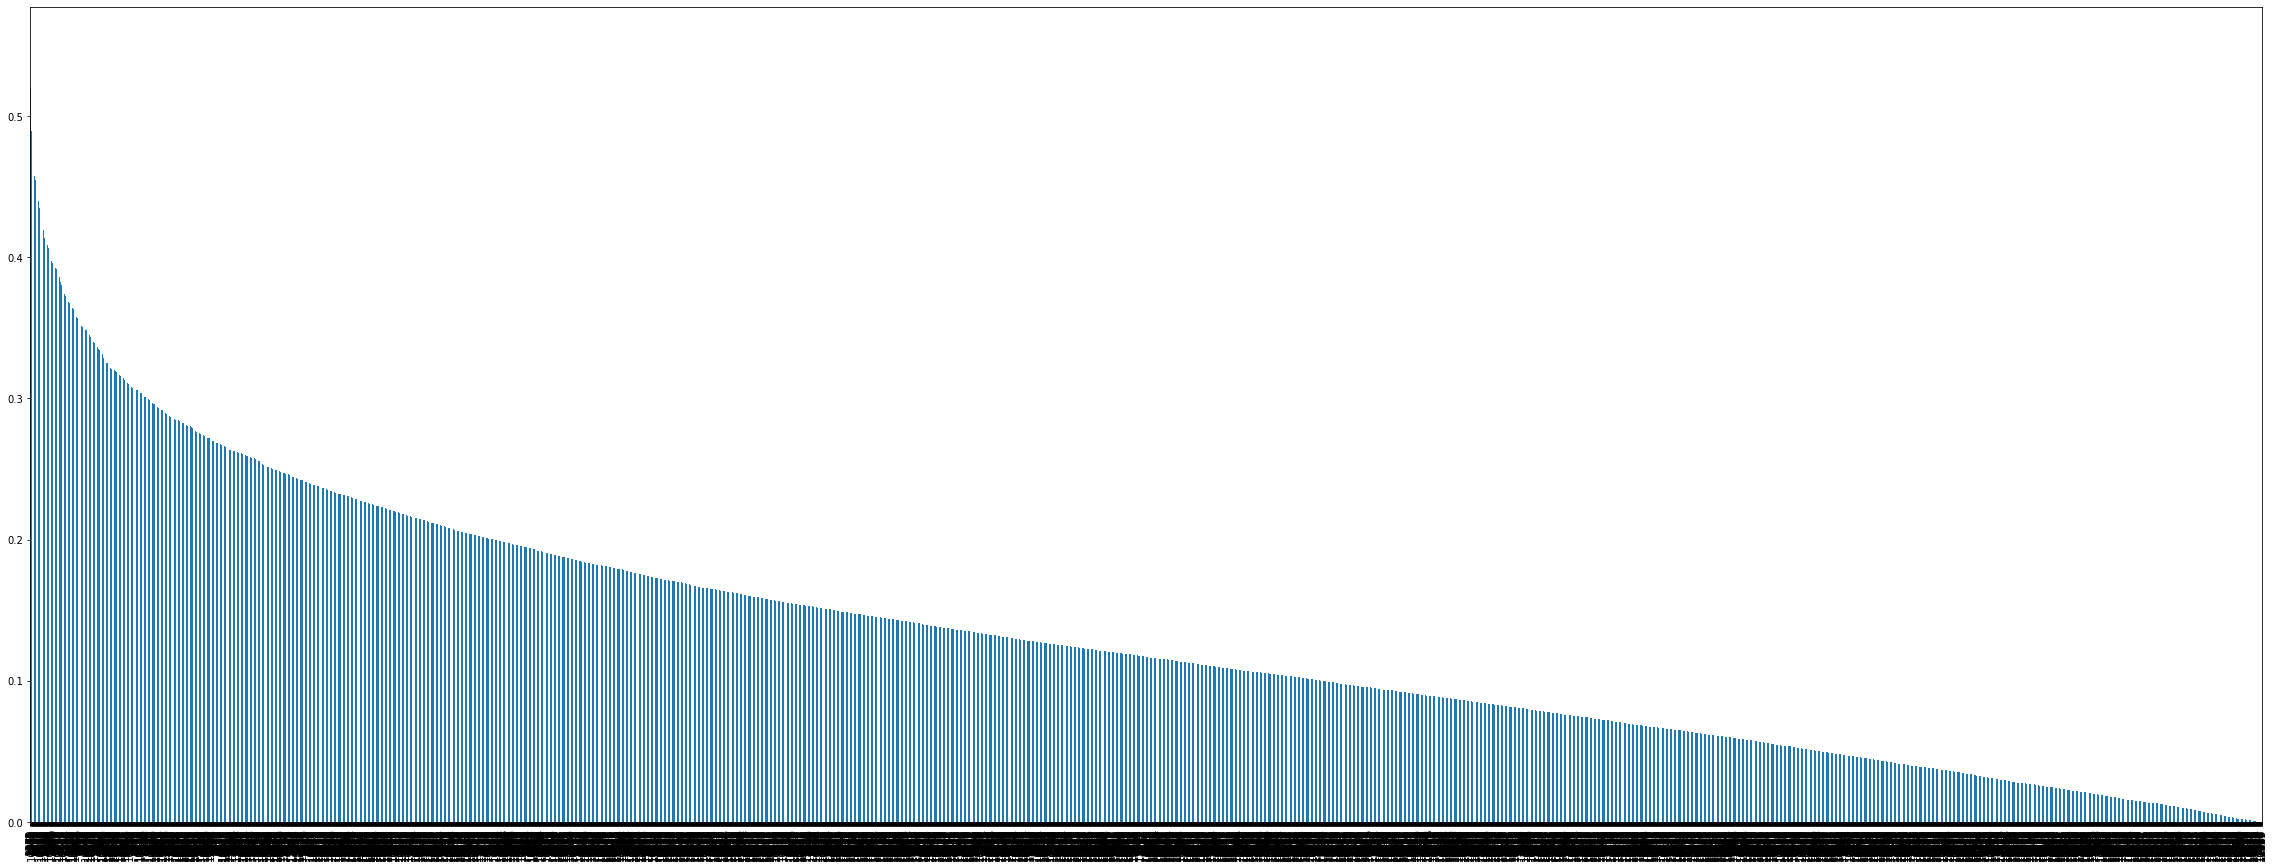

In [21]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [22]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_2]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_2):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  32378_at 
Selected Feature 2 is :  41483_s_at 
Selected Feature 3 is :  32235_at 
Selected Feature 4 is :  36596_r_at 
Selected Feature 5 is :  35566_f_at 
Selected Feature 6 is :  32808_at 
Selected Feature 7 is :  41276_at 
Selected Feature 8 is :  39070_at 
Selected Feature 9 is :  34792_at 
Selected Feature 10 is :  1069_at 
Selected Feature 11 is :  36659_at 
Selected Feature 12 is :  256_s_at 
Selected Feature 13 is :  34409_at 
Selected Feature 14 is :  35109_at 
Selected Feature 15 is :  35916_s_at 
Selected Feature 16 is :  33614_at 
Selected Feature 17 is :  35414_s_at 
Selected Feature 18 is :  36702_at 
Selected Feature 19 is :  1369_s_at 
Selected Feature 20 is :  33703_f_at 
Selected Feature 21 is :  2079_s_at 
Selected Feature 22 is :  36658_at 
Selected Feature 23 is :  1394_at 
Selected Feature 24 is :  32145_at 
Selected Feature 25 is :  1664_at 
Selected Feature 26 is :  40103_at 
Selected Feature 27 is :  40695_at 
Selected Feature 28 is :  

Selected Feature 791 is :  1607_at 
Selected Feature 792 is :  38385_at 
Selected Feature 793 is :  36195_at 
Selected Feature 794 is :  41738_at 
Selected Feature 795 is :  39088_at 
Selected Feature 796 is :  35835_at 
Selected Feature 797 is :  34779_at 
Selected Feature 798 is :  328_at 
Selected Feature 799 is :  35740_at 
Selected Feature 800 is :  35329_at 
Selected Feature 801 is :  32259_at 
Selected Feature 802 is :  38268_at 
Selected Feature 803 is :  31536_at 
Selected Feature 804 is :  38727_at 
Selected Feature 805 is :  40324_r_at 
Selected Feature 806 is :  37716_at 
Selected Feature 807 is :  32556_at 
Selected Feature 808 is :  33619_at 
Selected Feature 809 is :  36147_at 
Selected Feature 810 is :  1376_at 
Selected Feature 811 is :  35784_at 
Selected Feature 812 is :  37687_i_at 
Selected Feature 813 is :  38264_at 
Selected Feature 814 is :  32755_at 
Selected Feature 815 is :  648_at 
Selected Feature 816 is :  1651_at 
Selected Feature 817 is :  33448_at 
Sele

Selected Feature 1541 is :  1895_at 
Selected Feature 1542 is :  34008_at 
Selected Feature 1543 is :  38298_at 
Selected Feature 1544 is :  38260_at 
Selected Feature 1545 is :  1676_s_at 
Selected Feature 1546 is :  36825_at 
Selected Feature 1547 is :  41543_at 
Selected Feature 1548 is :  32223_at 
Selected Feature 1549 is :  32519_at 
Selected Feature 1550 is :  36355_at 
Selected Feature 1551 is :  769_s_at 
Selected Feature 1552 is :  39541_at 
Selected Feature 1553 is :  38512_r_at 
Selected Feature 1554 is :  39775_at 
Selected Feature 1555 is :  38662_at 
Selected Feature 1556 is :  141_s_at 
Selected Feature 1557 is :  39992_at 
Selected Feature 1558 is :  33319_at 
Selected Feature 1559 is :  41260_at 
Selected Feature 1560 is :  837_s_at 
Selected Feature 1561 is :  611_at 
Selected Feature 1562 is :  1409_at 
Selected Feature 1563 is :  34281_at 
Selected Feature 1564 is :  39379_at 
Selected Feature 1565 is :  41187_at 
Selected Feature 1566 is :  36043_at 
Selected Feat

Selected Feature 2300 is :  37003_at 
Selected Feature 2301 is :  710_at 
Selected Feature 2302 is :  32174_at 
Selected Feature 2303 is :  35692_at 
Selected Feature 2304 is :  40156_at 
Selected Feature 2305 is :  35580_at 
Selected Feature 2306 is :  1530_g_at 
Selected Feature 2307 is :  35534_at 
Selected Feature 2308 is :  35295_g_at 
Selected Feature 2309 is :  39174_at 
Selected Feature 2310 is :  35183_at 
Selected Feature 2311 is :  35245_at 
Selected Feature 2312 is :  32696_at 
Selected Feature 2313 is :  1892_s_at 
Selected Feature 2314 is :  41641_at 
Selected Feature 2315 is :  38724_at 
Selected Feature 2316 is :  32801_at 
Selected Feature 2317 is :  34570_at 
Selected Feature 2318 is :  34716_at 
Selected Feature 2319 is :  37753_at 
Selected Feature 2320 is :  38747_at 
Selected Feature 2321 is :  41428_at 
Selected Feature 2322 is :  40837_at 
Selected Feature 2323 is :  36172_s_at 
Selected Feature 2324 is :  1334_s_at 
Selected Feature 2325 is :  34367_at 
Selecte

Selected Feature 3084 is :  41784_at 
Selected Feature 3085 is :  39773_at 
Selected Feature 3086 is :  36813_at 
Selected Feature 3087 is :  1908_at 
Selected Feature 3088 is :  36267_at 
Selected Feature 3089 is :  41452_at 
Selected Feature 3090 is :  33662_at 
Selected Feature 3091 is :  36051_s_at 
Selected Feature 3092 is :  33706_at 
Selected Feature 3093 is :  41296_s_at 
Selected Feature 3094 is :  36960_at 
Selected Feature 3095 is :  1047_s_at 
Selected Feature 3096 is :  33447_at 
Selected Feature 3097 is :  479_at 
Selected Feature 3098 is :  1652_at 
Selected Feature 3099 is :  31596_f_at 
Selected Feature 3100 is :  38582_at 
Selected Feature 3101 is :  41076_at 
Selected Feature 3102 is :  35938_at 
Selected Feature 3103 is :  39424_at 
Selected Feature 3104 is :  826_at 
Selected Feature 3105 is :  39915_at 
Selected Feature 3106 is :  37378_r_at 
Selected Feature 3107 is :  38599_s_at 
Selected Feature 3108 is :  33792_at 
Selected Feature 3109 is :  37784_at 
Selecte

Selected Feature 3662 is :  40701_at 
Selected Feature 3663 is :  1020_s_at 
Selected Feature 3664 is :  34697_at 
Selected Feature 3665 is :  1919_at 
Selected Feature 3666 is :  36720_at 
Selected Feature 3667 is :  39655_at 
Selected Feature 3668 is :  37722_s_at 
Selected Feature 3669 is :  35834_at 
Selected Feature 3670 is :  35502_at 
Selected Feature 3671 is :  840_at 
Selected Feature 3672 is :  534_s_at 
Selected Feature 3673 is :  34543_at 
Selected Feature 3674 is :  36078_at 
Selected Feature 3675 is :  34699_at 
Selected Feature 3676 is :  34488_i_at 
Selected Feature 3677 is :  39180_at 
Selected Feature 3678 is :  34077_at 
Selected Feature 3679 is :  40729_s_at 
Selected Feature 3680 is :  32238_at 
Selected Feature 3681 is :  33988_at 
Selected Feature 3682 is :  1199_at 
Selected Feature 3683 is :  36967_g_at 
Selected Feature 3684 is :  32915_at 
Selected Feature 3685 is :  845_at 
Selected Feature 3686 is :  38443_at 
Selected Feature 3687 is :  32776_at 
Selected 

In [23]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 4200
['32378_at ', '41483_s_at ', '32235_at ', '36596_r_at ', '35566_f_at ', '32808_at ', '41276_at ', '39070_at ', '34792_at ', '1069_at ', '36659_at ', '256_s_at ', '34409_at ', '35109_at ', '35916_s_at ', '33614_at ', '35414_s_at ', '36702_at ', '1369_s_at ', '33703_f_at ', '2079_s_at ', '36658_at ', '1394_at ', '32145_at ', '1664_at ', '40103_at ', '40695_at ', '41771_g_at ', '33131_at ', '41435_at ', '38675_at ', '38479_at ', '37020_at ', '36894_at ', '823_at ', 'AFFX-hum_alu_at ', '39370_at ', '36024_at ', '38051_at ', '36184_at ', '1235_at ', '37655_at ', '1367_f_at ', '40718_at ', '632_at ', '38229_at ', '35336_at ', '37923_at ', '319_g_at ', '40867_at ', '36616_at ', '37745_s_at ', '33308_at ', '34811_at ', '33754_at ', '32662_at ', '291_s_at ', '33545_at ', '38487_at ', '33383_f_at ', '41220_at ', '32590_at ', '38971_r_at ', '39350_at ', '31773_at ', '297_g_at ', '35412_at ', '36994_at ', '39389_at ', '36851_g_at ', '38729_at ', '33699_at ', '416

In [24]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,32378_at,41483_s_at,32235_at,36596_r_at,35566_f_at,32808_at,41276_at,39070_at,34792_at,1069_at,...,40594_r_at,41193_at,33802_at,37738_g_at,33371_s_at,41845_at,153_f_at,34065_at,1316_at,250_at
116,-0.890271,3.013027,0.046863,-0.632370,-0.572445,-0.528458,-0.685495,-0.323686,-1.065416,-0.074668,...,0.145308,0.721171,1.114587,0.145474,0.315697,-1.321001,-1.009757,-0.893101,-1.326449,-0.117988
55,0.050728,-0.423036,-0.546439,-0.270487,1.241250,0.626927,-1.078721,-0.275933,-0.271079,-0.246380,...,-0.111326,1.242196,0.053041,-1.015353,-0.183457,-1.783223,-1.250272,-0.968370,-0.962385,-0.403759
26,-1.153657,-0.298102,-0.852081,-0.211201,-0.105905,0.050207,-0.318702,0.921209,1.400690,0.103045,...,-0.399372,1.343258,-0.537633,-0.113101,0.808645,0.632704,0.115325,0.171207,0.410189,-0.087841
130,-0.349643,0.245575,-0.583619,-0.055180,2.347136,0.177503,-0.213364,-0.557911,0.054288,-0.130522,...,1.165906,-0.316504,-0.729774,0.624746,-0.325766,-0.276163,-0.083885,-0.905144,0.479579,1.736774
177,0.562408,-0.520316,-1.116548,0.587795,-0.630254,0.316407,-0.670912,1.919828,0.486168,-0.513426,...,2.213758,-0.872063,-0.706378,0.058143,-0.343403,-0.593150,-0.387635,-1.145671,-0.183107,-0.450286


# Selection of features using F Classification 

In [25]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i] # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train2, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :140.70841598510742 seconds


In [26]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 3482


In [27]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['862_at ', '1595_at ', '39967_at ', '40825_at ', '40729_s_at ', '39032_at ', '38752_r_at ', '33441_at ', '38115_at ', '1130_at ', '33060_g_at ', '41825_at ', '38822_at ', '32724_at ', '40653_at ', '35309_at ', '41071_at ', '32909_at ', '31544_at ', '31438_s_at ', '33117_r_at ', 'AFFX-HUMGAPDH/M33197_5_st ', '31482_at ', '36764_at ', '41435_at ', '38252_s_at ', '41647_at ', '225_at ', '36134_at ', '38317_at ', '39723_at ', '32629_f_at ', '38504_at ', '33828_at ', '1703_g_at ', '38323_at ', '38377_at ', '37151_at ', '31873_at ', '32846_s_at ', '202_at ', '39808_at ', '40534_at ', '38655_at ', '41493_at ', '33228_g_at ', '41196_at ', '840_at ', '1749_at ', '39272_g_at ', '477_at ', '268_at ', '36500_at ', '31977_at ', '32123_at ', '1100_at ', '41503_at ', '39489_g_at ', '35335_at ', '35832_at ', '732_f_at ', '38832_r_at ', '39010_at ', '31885_at ', '39263_at ', '31503_at ', '1639_s_at ', '36422_s_at ', '40767_at ', '986_at ', '40042_r_at ', '35501

In [28]:
required_features_fc = selected_features_fc[:number_of_features_required_3]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 2394


In [29]:
X_train3 = X_train[required_features_fc]
X_train3.head()

,862_at,1595_at,39967_at,40825_at,40729_s_at,39032_at,38752_r_at,33441_at,38115_at,1130_at,...,34518_at,36862_at,34257_at,40837_at,33824_at,39537_at,33151_s_at,39283_at,399_at,31951_s_at
116,-0.576797,2.002889,-0.791808,-0.259064,-0.771634,0.634081,-0.327953,-1.653894,0.314353,-1.371724,...,-0.788851,-0.194917,-1.034525,-0.052859,-0.408746,-0.142042,-1.088836,-1.071593,-1.257999,-1.260101
55,-0.605795,-1.052316,-1.217056,-0.178740,-0.349777,0.024907,0.047230,0.582764,0.392703,-0.320983,...,-2.696351,-0.408818,-1.087792,0.514945,-0.181493,-0.301137,-0.892139,-0.361198,-1.470125,0.021556
26,-0.213484,-0.028761,-0.121581,-0.431175,0.474027,-0.432249,-0.799299,-0.950857,-0.454351,0.282208,...,0.361320,-0.721477,0.125391,-0.061604,0.687625,0.472720,0.466860,0.879874,0.346961,1.073434
130,-0.657893,0.168460,-0.242564,-0.345228,-0.664067,0.063682,-0.154788,-0.779126,-0.108681,-0.500919,...,-0.911041,0.012248,-0.440293,-0.884891,0.911532,-0.452454,2.015006,0.413875,-0.618161,-0.056539
177,2.257947,-1.499671,1.038121,-0.323409,-0.779090,-0.516347,-0.828545,-0.605197,-0.475348,0.163189,...,-0.217936,0.116559,-0.517164,-0.531091,-0.311453,-0.075083,0.606733,-0.361551,-0.569022,0.756411


In [30]:
X_test3 = X_test[required_features_fc]
X_test3.head()

,862_at,1595_at,39967_at,40825_at,40729_s_at,39032_at,38752_r_at,33441_at,38115_at,1130_at,...,34518_at,36862_at,34257_at,40837_at,33824_at,39537_at,33151_s_at,39283_at,399_at,31951_s_at
18,0.322343,-0.854580,-0.118267,-0.551806,-0.225472,-0.573581,-1.181836,-0.649625,1.306974,0.912512,...,-0.254843,0.713661,-0.875999,-1.159871,-0.311281,-0.427542,-0.834521,-1.430855,-0.174357,0.956906
45,-0.409246,0.299540,-0.456393,-0.428231,0.541771,-1.045731,-0.848775,0.182973,-0.349791,-0.468523,...,0.270824,-0.552086,-0.200112,-0.273127,-1.099688,0.679134,-0.075945,0.263137,-0.069332,-0.734461
33,0.105201,0.941882,-0.364391,-0.315059,1.122043,0.743987,-0.644814,0.448504,0.161880,0.191711,...,-1.574537,-1.353258,0.012637,1.252087,1.161947,0.344469,0.766873,0.437555,-0.147539,2.031481
37,-0.184682,0.067788,0.102310,-0.560615,0.486481,-0.691471,-0.558484,0.459245,-0.704480,1.364288,...,0.460156,-0.778366,0.347550,-0.136050,-0.883049,0.282913,0.835220,1.141589,-0.129544,1.634759
109,-0.102013,0.368086,-0.463563,-0.504427,0.379866,-0.517023,-0.289748,-0.515487,-0.646140,0.009663,...,2.375579,-0.612160,0.434628,-0.441164,-1.405185,-1.200344,-0.421655,-0.110969,0.621375,1.259012


In [31]:
X_test3.shape

(41, 2394)

In [32]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [33]:
temp_fscore=0
temp_cm = np.zeros([5,5])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 95.1220
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 95.0617
Testing accuracy on selected features for 2 neighbors: 90.2439
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 90.2439
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 93.8272
Testing accuracy on selected features for 4 neighbors: 82.9268
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.0617
Testing accuracy on selected features for 5 neighbors: 85.3659
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 92.5926
Testing accuracy on selected features for 6 neighbors: 85.3659
KNN Classfier for 7 neighbors:
Training accuracy on

In [34]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 1  3  0  0  0]
 [ 1  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 2.63157895  1.36842105  0.          0.          0.        ]
 [ 1.78947368  0.          0.05263158  0.          0.15789474]
 [ 1.31578947  0.          0.          1.68421053  0.        ]
 [ 0.05263158  0.          0.          0.          2.94736842]]


Confusion Matrix of KNN Classifier:


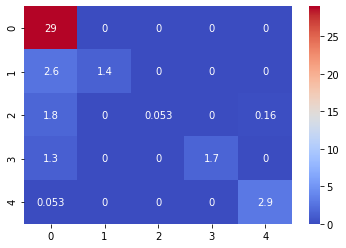

In [35]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [36]:
f_score_knn = f1_score(y_test3, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9512195121951219
Average F-Score is : 0.8549422336328627


# SVM(Support Vector Machine)

In [37]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 99.3827
Testing accuracy on selected features: 87.8049


In [38]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 2  2  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


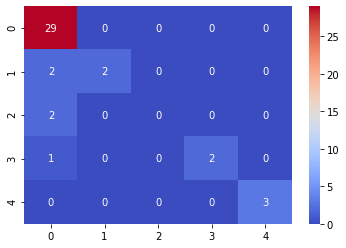

In [39]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [40]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc, average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8780487804878049
